# California 2045
---
Plots in the slide deck presented to Nathan on 11/27/2018 have been generated through this notebook.

[Base Case](#base)
1. [Chart](#base_chart)
2. [Stacked plots](#base_stack)
3. [Curtailment plots](#base_curtailment)


[California 2020](#ca2020)
1. [Chart](#ca2020_chart)
2. [Stacked plots](#ca2020_stack)
3. [Curtailment plots](#ca2020_curtailment)


[Congestion 2020](#congestion2020)
1. [Chart](#congestion2020_chart)
2. [Stacked plots](#congestion2020_stack)
3. [Curtailment plots](#comgestion2020_curtailment)


[California 2030](#ca2030)
1. [Chart](#ca2030_chart)
2. [Stacked plots](#ca2030_stack)
3. [Curtailment plots](#ca2030_curtailment)


[Congestion 2030](#congestion2030)
1. [Chart](#congestion2030_chart)
2. [Stacked plots](#congestion2030_stack)
3. [Curtailment plots](#comgestion2030_curtailment)


[West 2020](#west2020)
1. [Chart](#west2020_chart)
2. [Stacked plots](#west2020_stack)
3. [Curtailment plots](#west2020_curtailment)


[West 2030](#west2030)
1. [Chart](#west2030_chart)
2. [Stacked plots](#west2030_stack)
3. [Curtailment plots](#west2030_curtailment)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from postreise.plot.analyze_pg import AnalyzePG as apg
from powersimdata.scenario.scenario import Scenario 

## Base Case
<a id="base"></a>
Multiperiod  
Solar power: SAM  
demand v3  
No multiplier for any of the generator in the grid

In [2]:
s = Scenario('original')

/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/ecdsakey.py:164: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.ecdsa_curve.curve_class(), pointinfo
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:39: CryptographyDeprecationWarning: encode_point has been deprecated on EllipticCurvePublicNumbers and will be removed in a future version. Please use EllipticCurvePublicKey.public_bytes to obtain both compressed and uncompressed point encoding.
  m.add_string(self.Q_C.public_numbers().encode_point())
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:96: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.curve, Q_S_bytes
/Users/kmueller/REM/lib

SCENARIO: base | original

--> State
analyze
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="base_chart"></a>

In [3]:
s.print_scenario_info()

--------------------
SCENARIO INFORMATION
--------------------
id: 0
plan: base
name: original
state: analyze
interconnect: Western
base_demand: v3
base_hydro: v1
base_solar: v2
base_wind: v1
change_table: No
start_date: 2016-01-01 00:00:00
end_date: 2016-12-31 23:00:00
interval: 144H
runtime: 9:25
infeasibilities: 34:5_35:5


--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


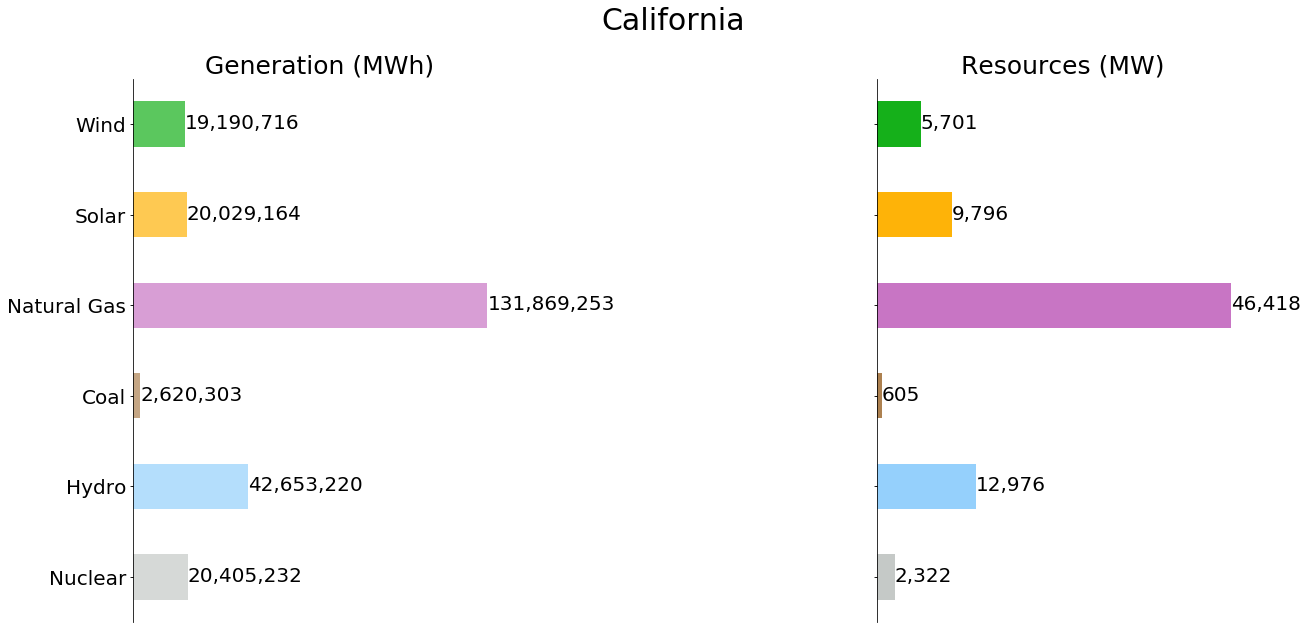

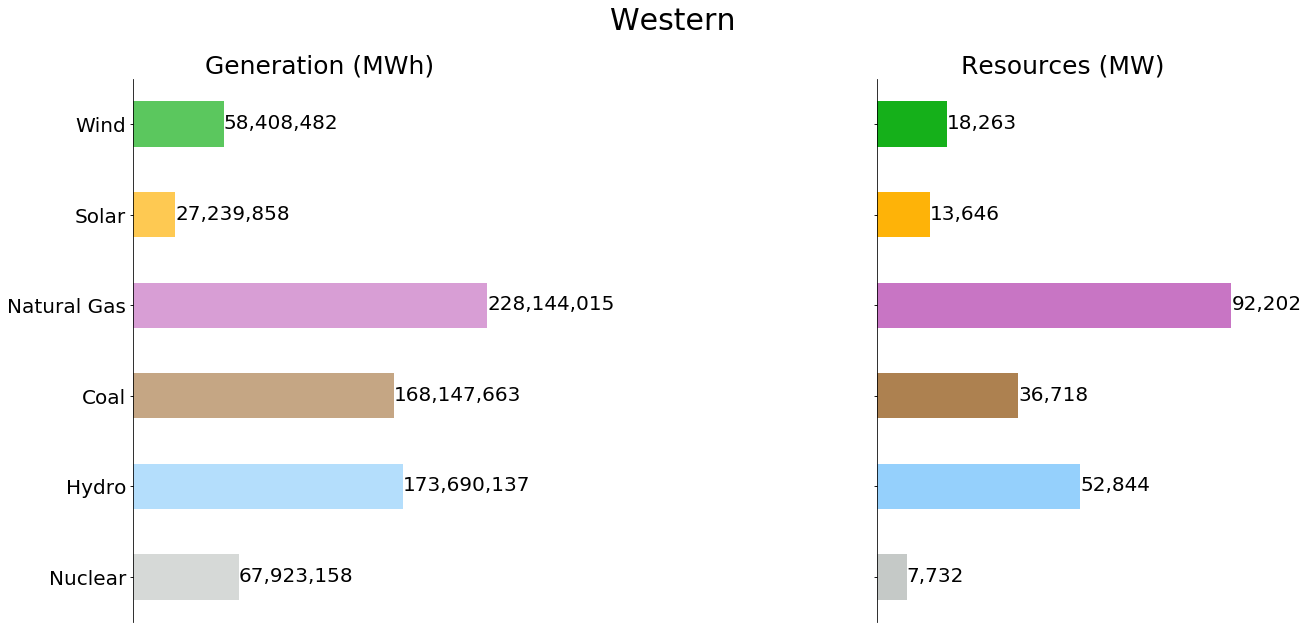

Total Generation in Western Interconnection: 723553316 MWh
Total Capacity in Western Interconnection: 221409 MW


In [4]:
chart = apg(s,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked plots
<a id="base_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


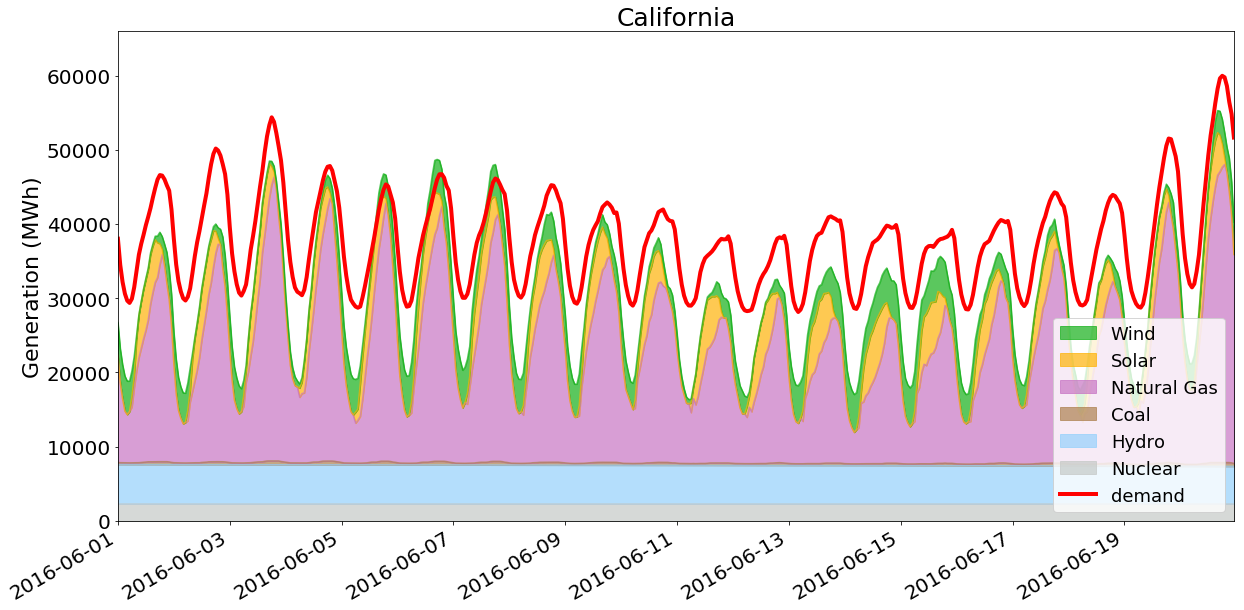

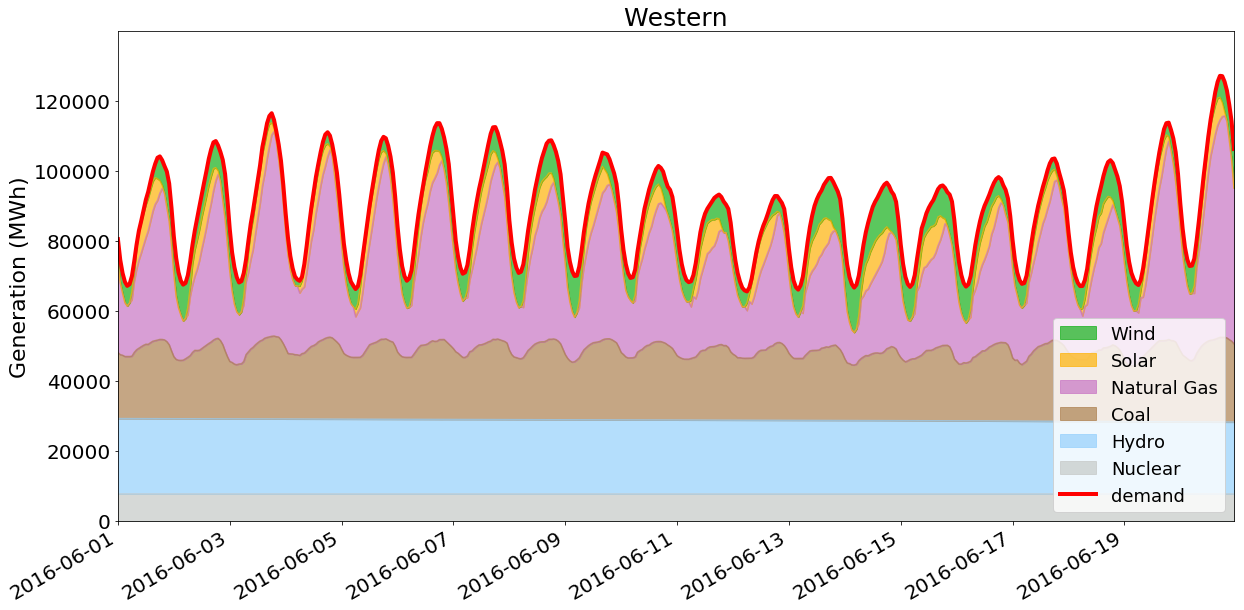

Generation in the Western interconnection in MWh:
84796212.77713582


In [5]:
stack = apg(s,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment plots
<a id="base_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


/Users/kmueller/REM/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


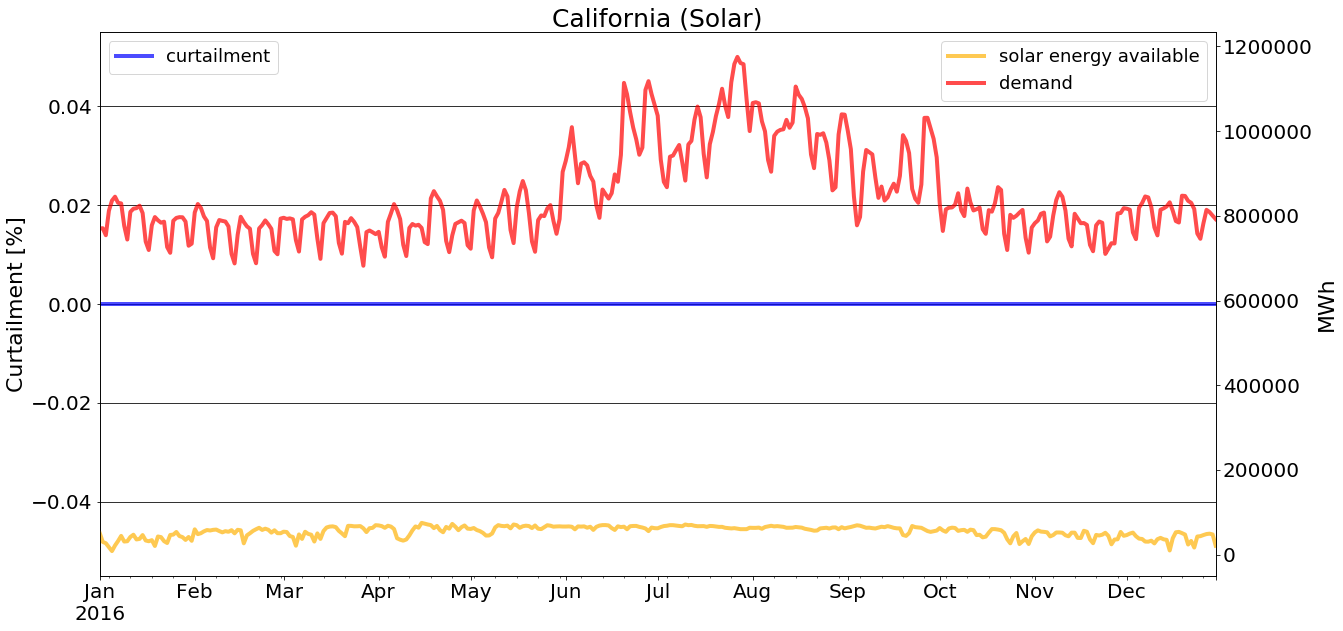

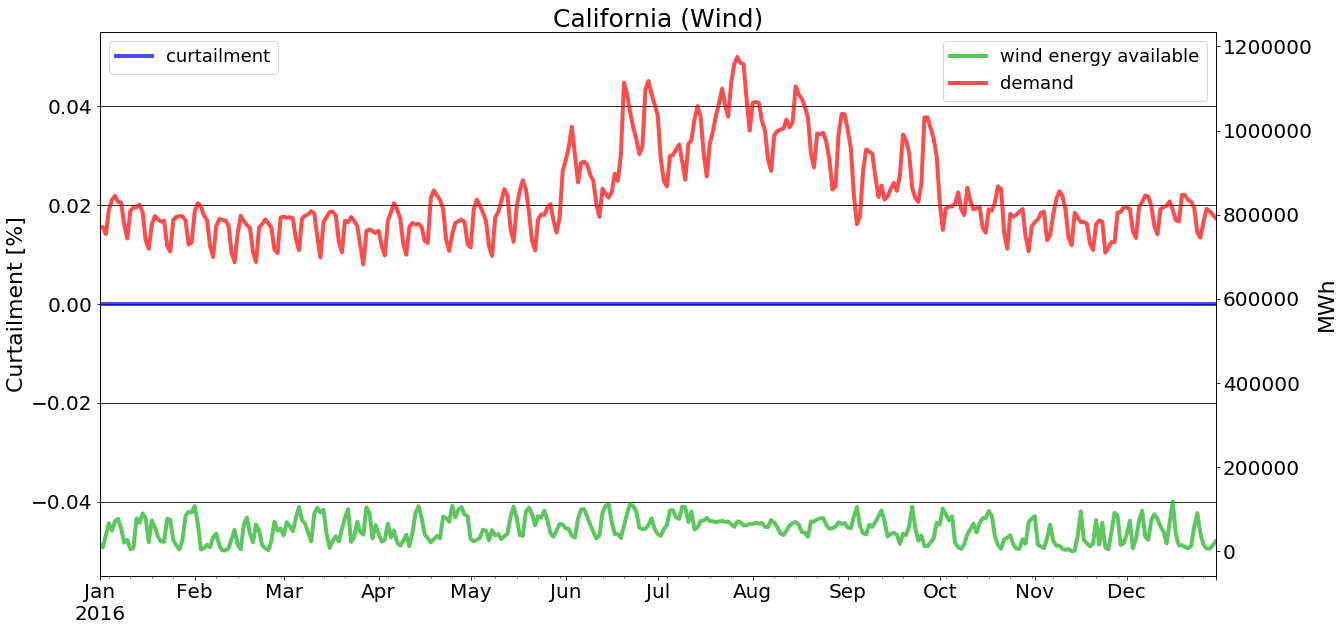

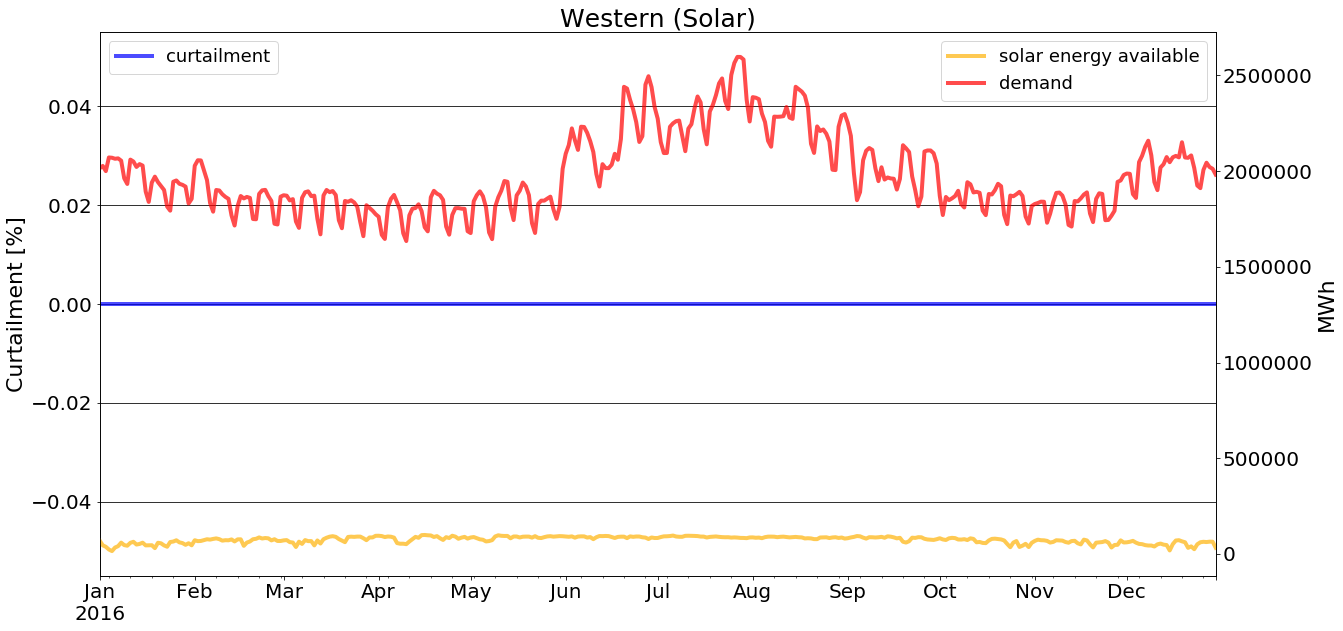

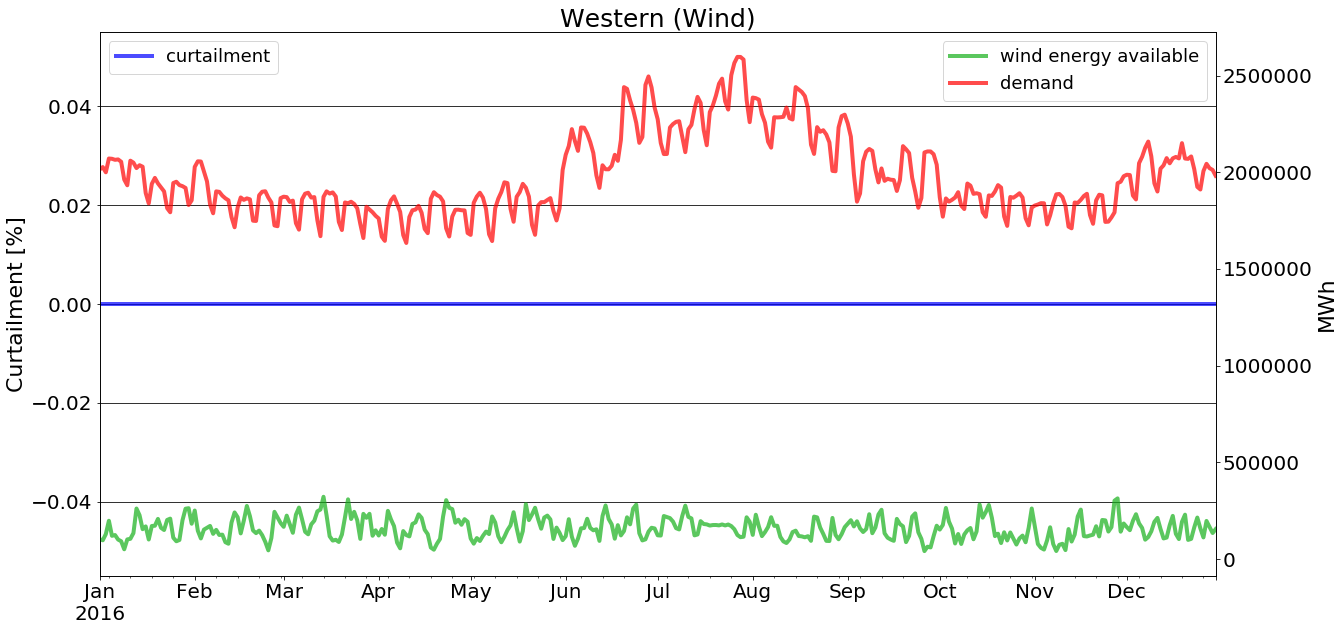

Maximum curtailment for solar generators in the Western Interconnection: 0 %
Maximum curtailment for wind generators in the Western Interconnection: 0 %


In [6]:
curtailment = apg(s,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()
print("Maximum curtailment for solar generators in the Western Interconnection: %d %%" % 
      round(data_curtailment['Western']['solar'].curtailment.max()))
print("Maximum curtailment for wind generators in the Western Interconnection: %d %%" % 
      round(data_curtailment['Western']['wind'].curtailment.max()))

## California 2020
<a id="ca2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 1.52 for solar power output in CA and 1.48 for wind power output in CA.

In [7]:
s2020 = Scenario('ca2020')

/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/ecdsakey.py:164: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.ecdsa_curve.curve_class(), pointinfo
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:39: CryptographyDeprecationWarning: encode_point has been deprecated on EllipticCurvePublicNumbers and will be removed in a future version. Please use EllipticCurvePublicKey.public_bytes to obtain both compressed and uncompressed point encoding.
  m.add_string(self.Q_C.public_numbers().encode_point())
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:96: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.curve, Q_S_bytes
/Users/kmueller/REM/lib

SCENARIO: ca2045 | ca2020

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="ca2020_chart"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


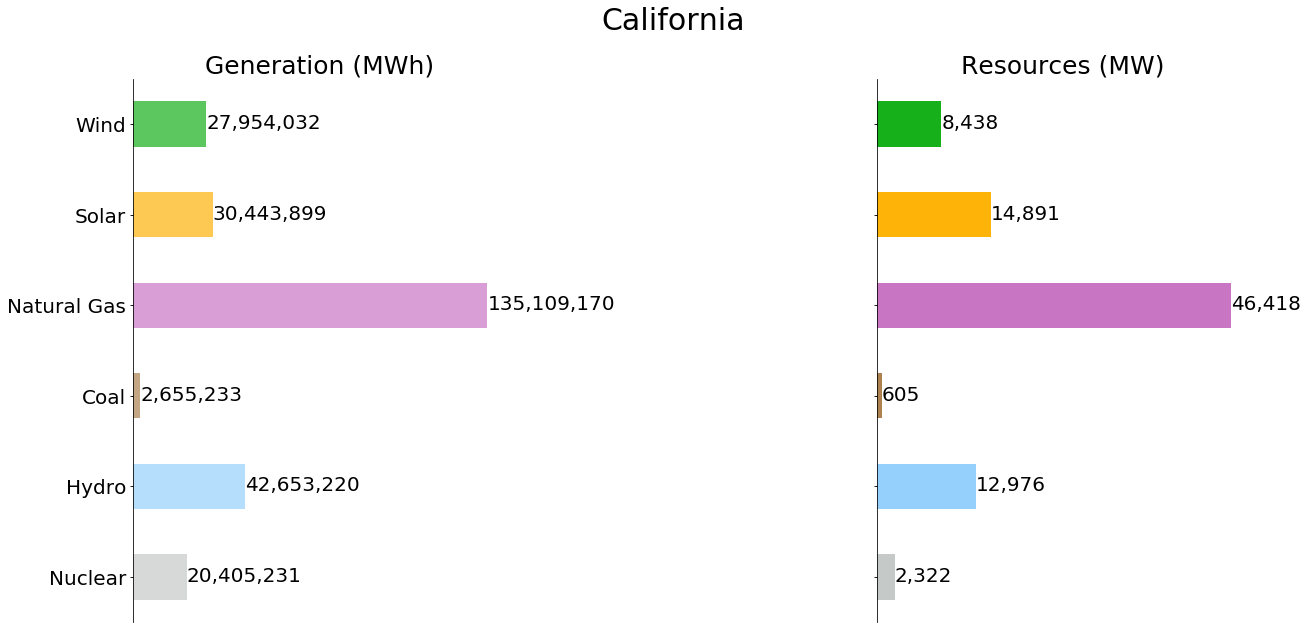

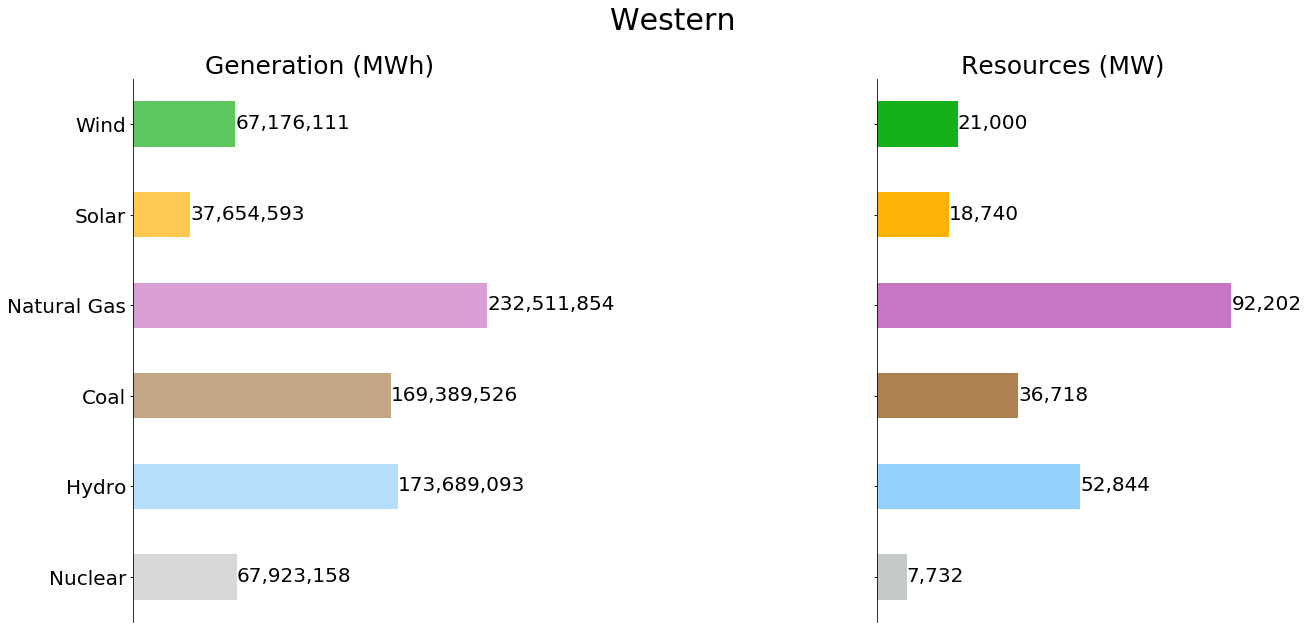

Total Generation in Western Interconnection: 748344338 MWh
Total Capacity in Western Interconnection: 229240 MW


In [8]:
chart = apg(s2020,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="ca2020_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


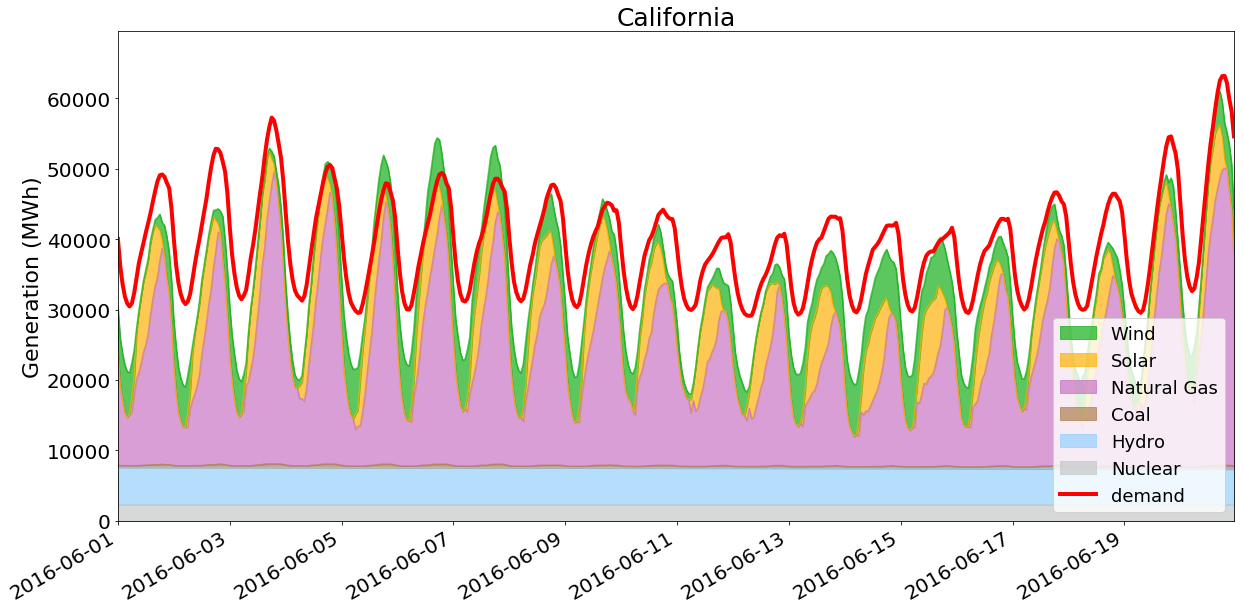

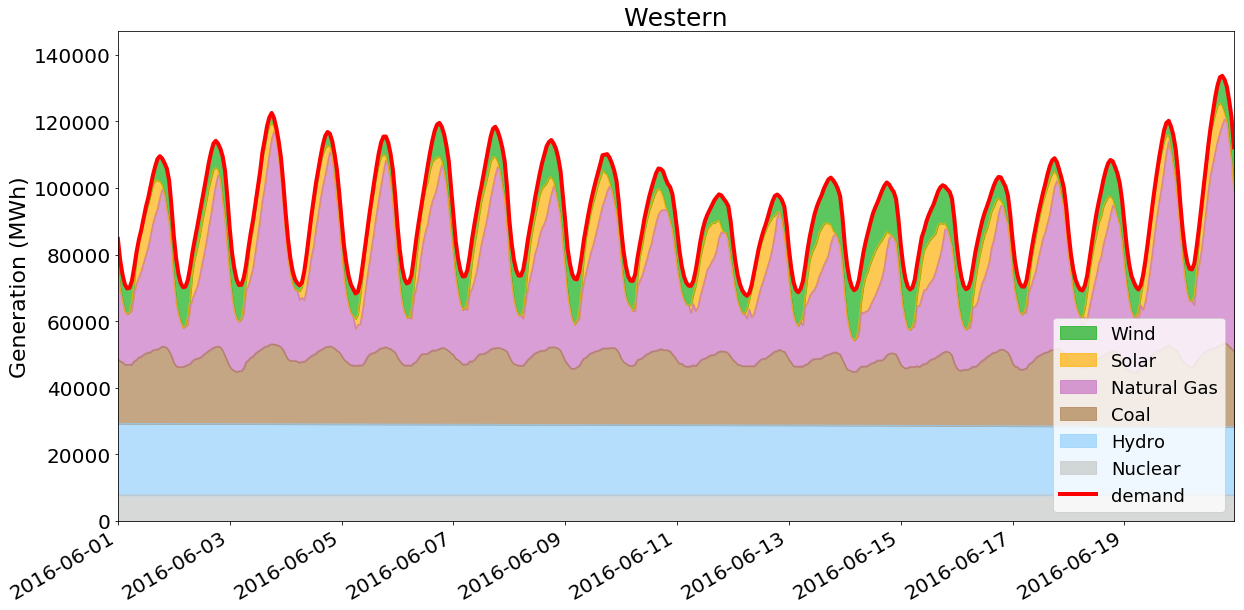

Generation in the Western interconnection in MWh:
88388034.28572135


In [9]:
stack = apg(s2020,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="ca2020_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


/Users/kmueller/REM/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


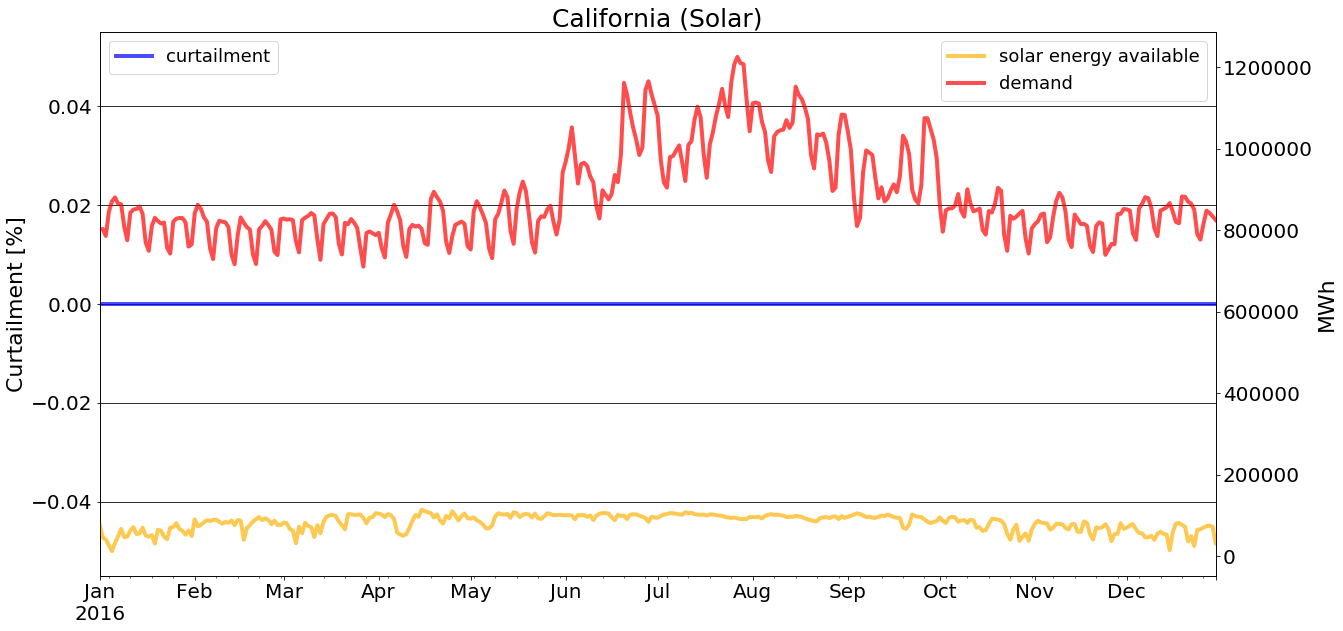

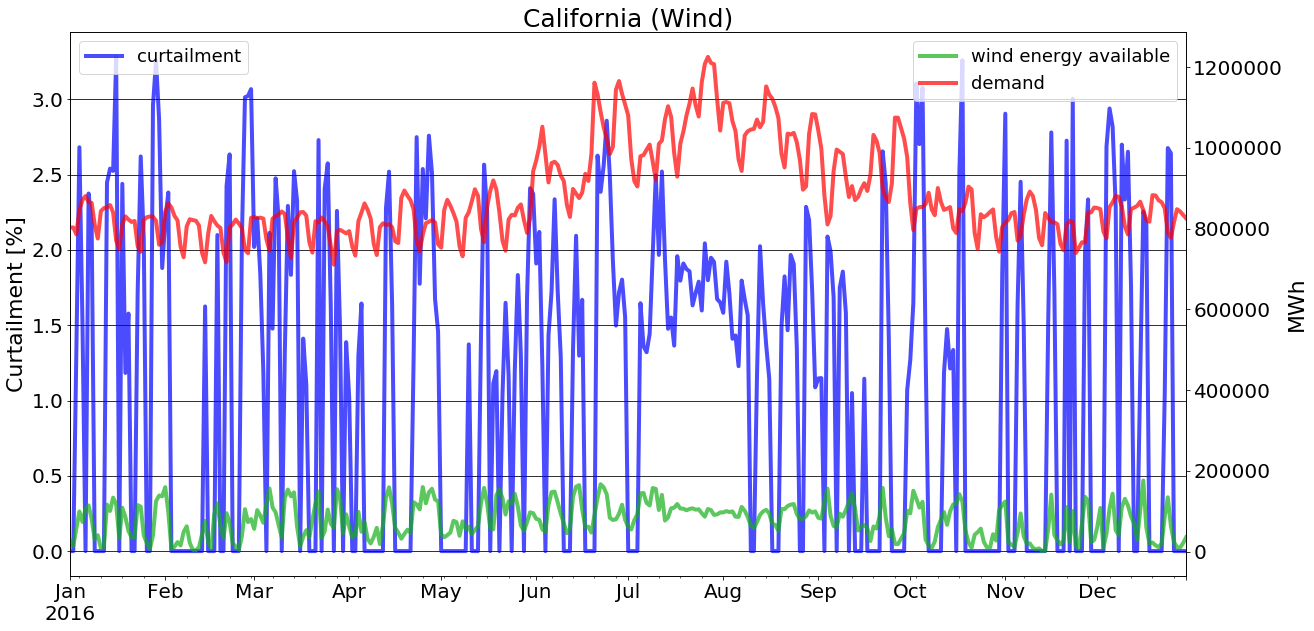

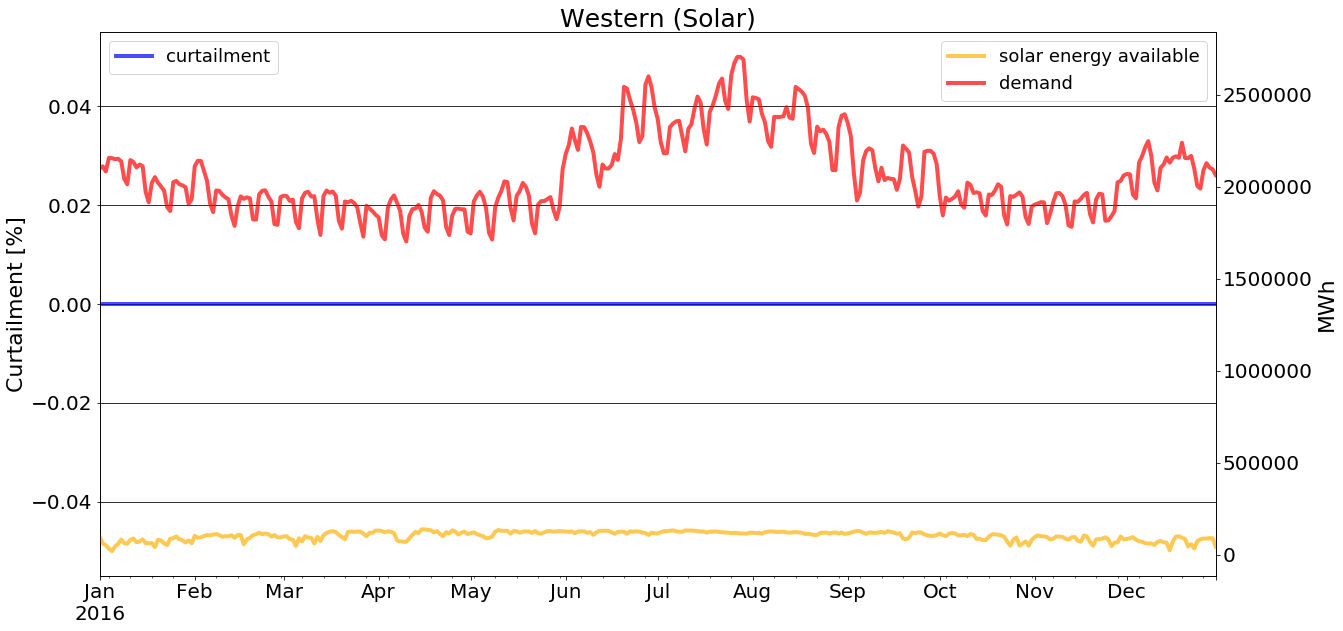

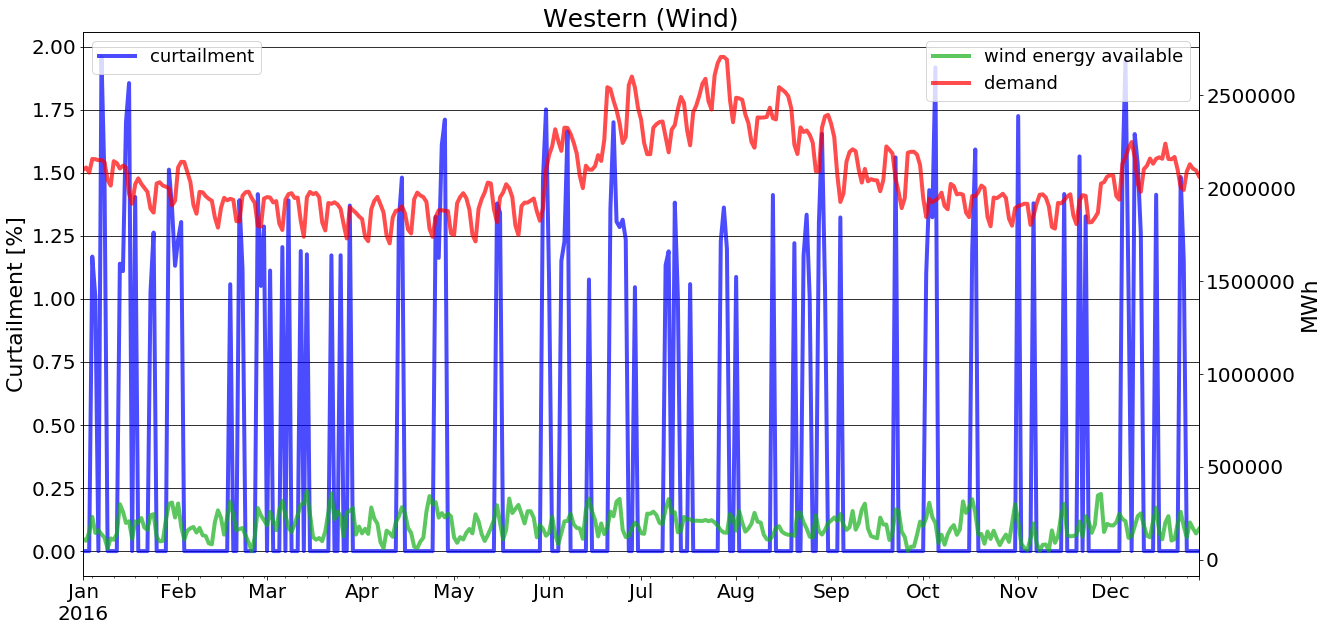

In [10]:
curtailment = apg(s2020,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [11]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.0 %
Curtailment California/wind: 1.6 %
Curtailment Western/solar: 0.0 %
Curtailment Western/wind: 0.7 %


## Congestion 2020
<a id="congestion2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 1.52 for solar power output in CA and 1.48 for wind power output in CA  
Capacity of congested transmission lines in California: x2

In [12]:
s2020CaCong = Scenario('ca2020FixCaCong')

/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/ecdsakey.py:164: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.ecdsa_curve.curve_class(), pointinfo
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:39: CryptographyDeprecationWarning: encode_point has been deprecated on EllipticCurvePublicNumbers and will be removed in a future version. Please use EllipticCurvePublicKey.public_bytes to obtain both compressed and uncompressed point encoding.
  m.add_string(self.Q_C.public_numbers().encode_point())
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:96: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.curve, Q_S_bytes
/Users/kmueller/REM/lib

SCENARIO: ca2045 | ca2020FixCaCong

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="congestion2020_chart"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


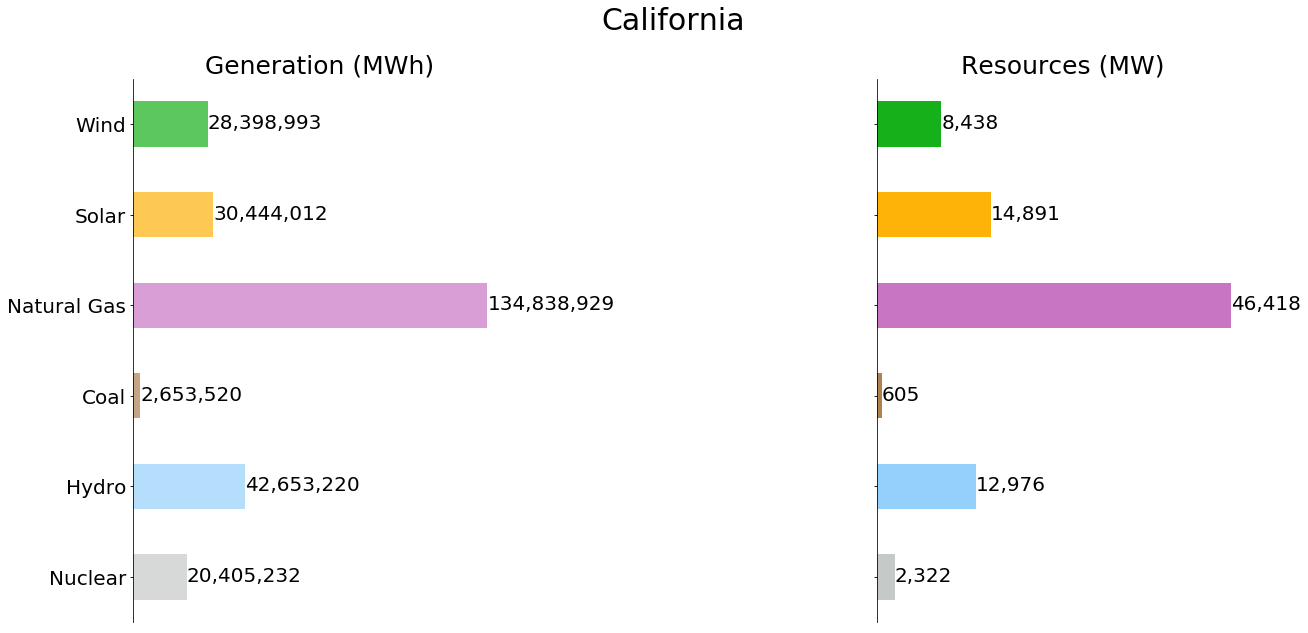

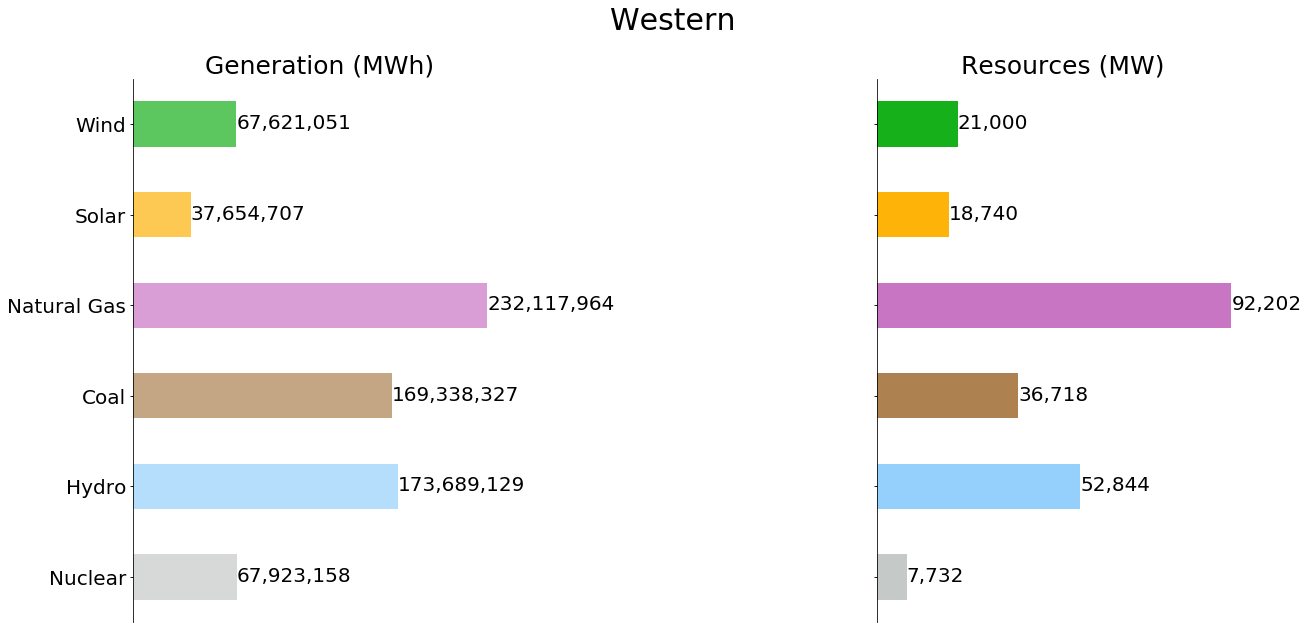

Total Generation in Western Interconnection: 748344338 MWh
Total Capacity in Western Interconnection: 229240 MW


In [13]:
chart = apg(s2020CaCong,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="congestion2020_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


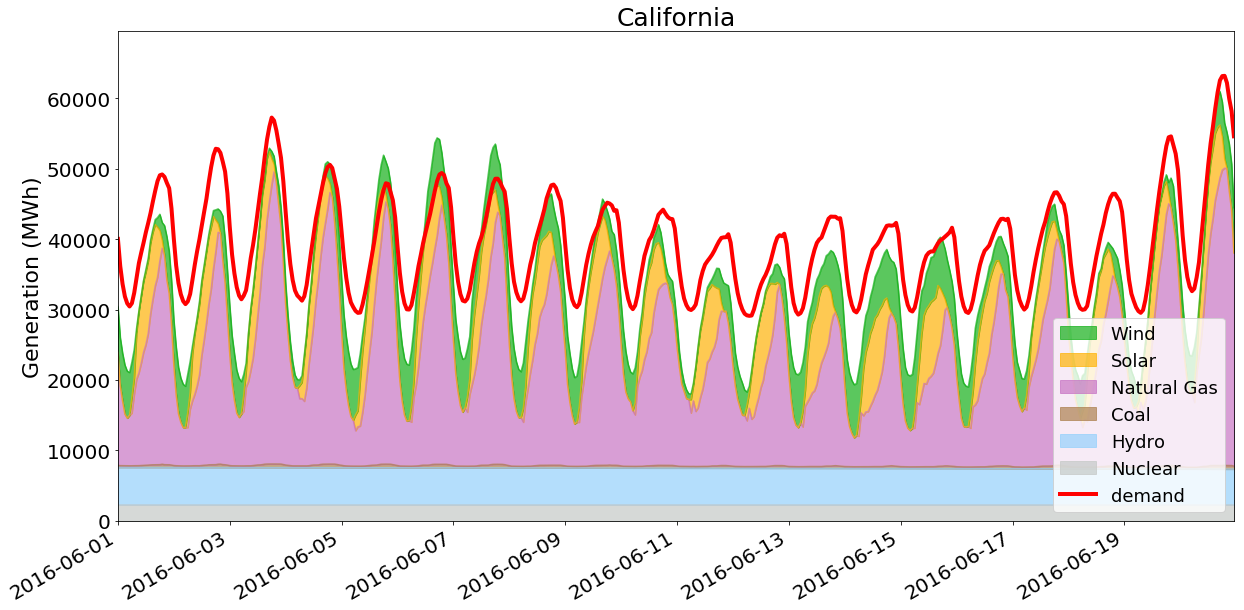

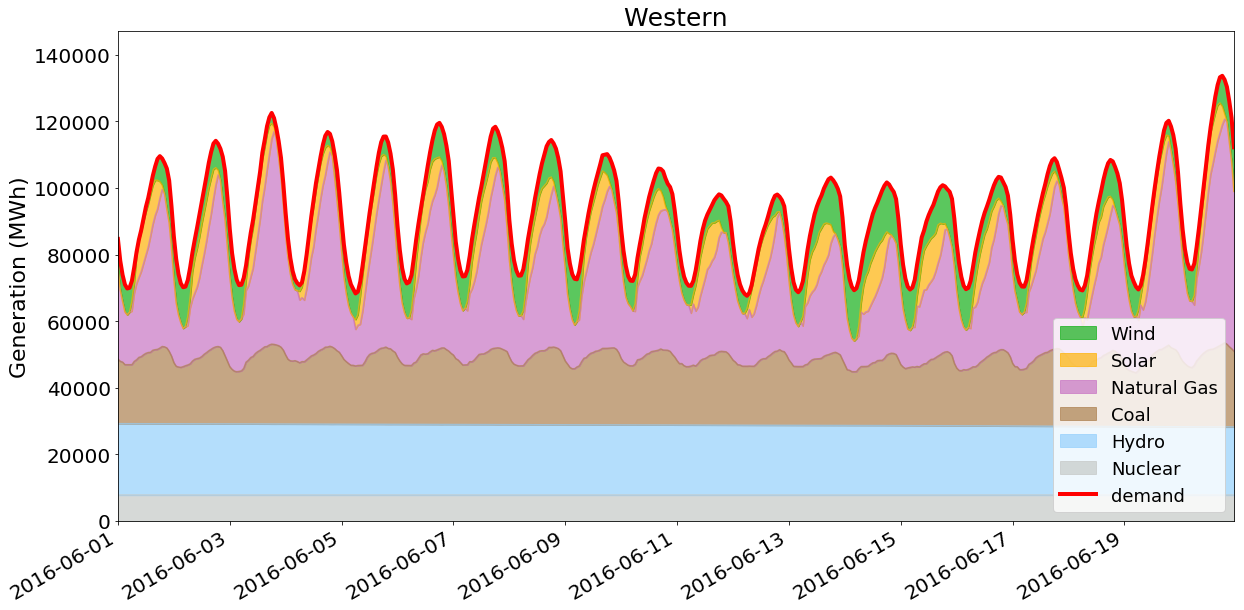

Generation in the Western interconnection in MWh:
88388034.3513776


In [14]:
stack = apg(s2020CaCong,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="congestion2020_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


/Users/kmueller/REM/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


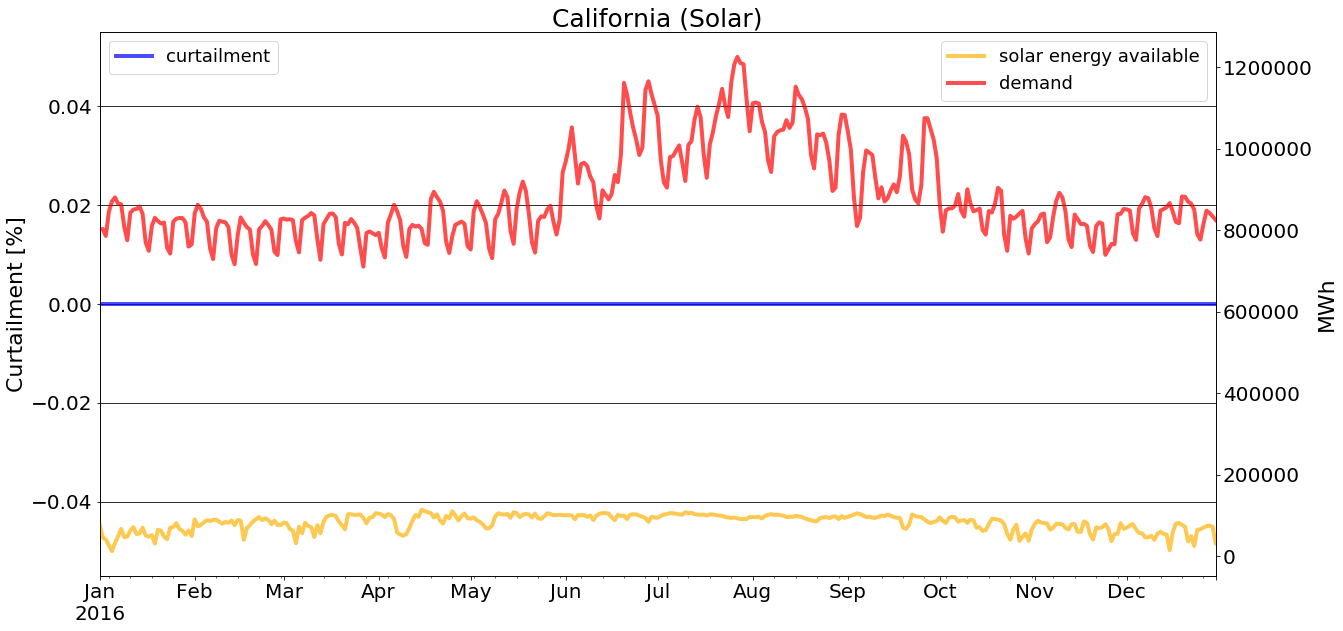

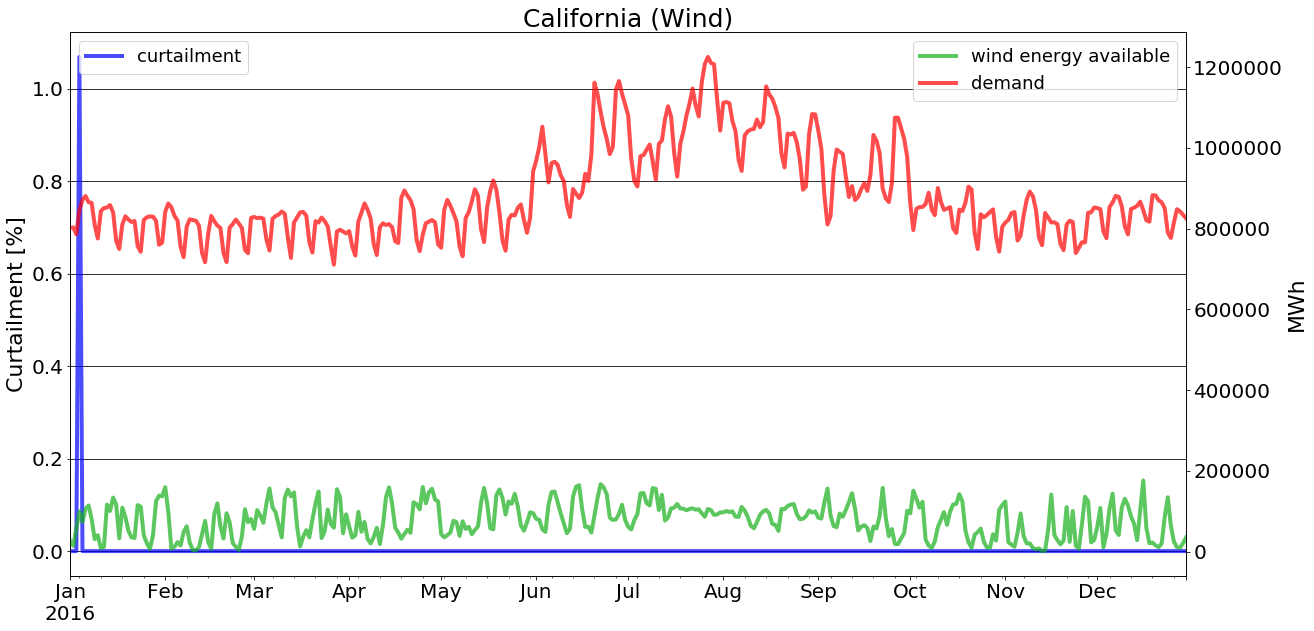

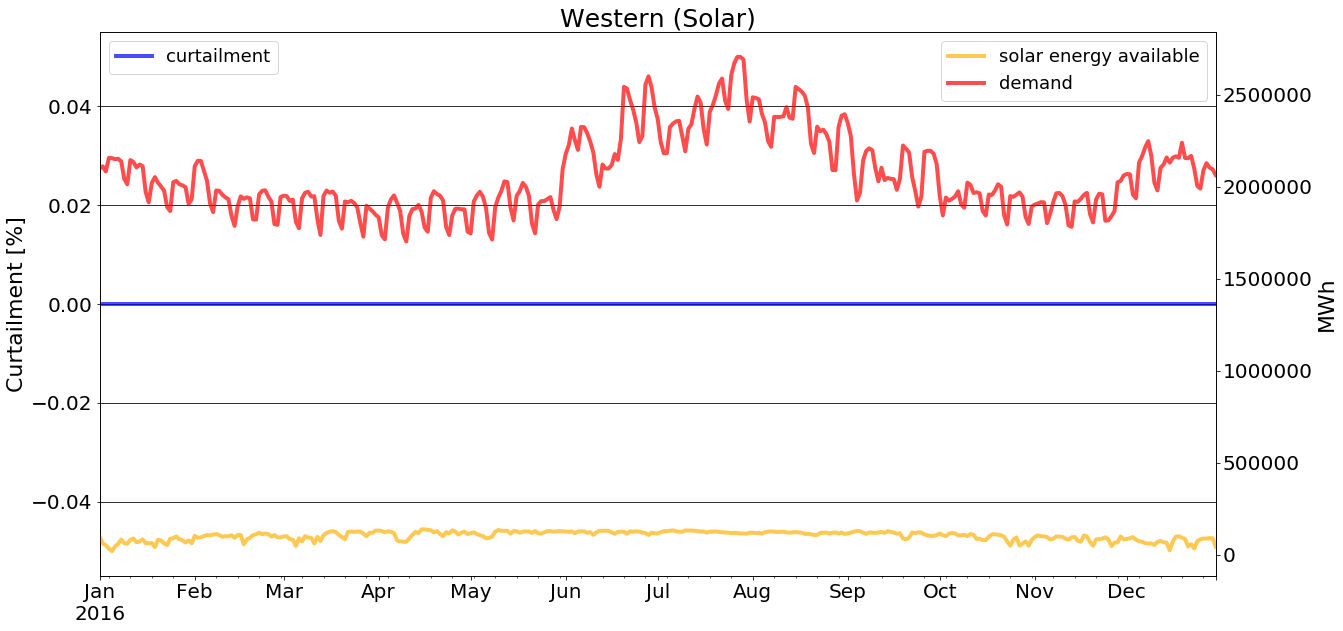

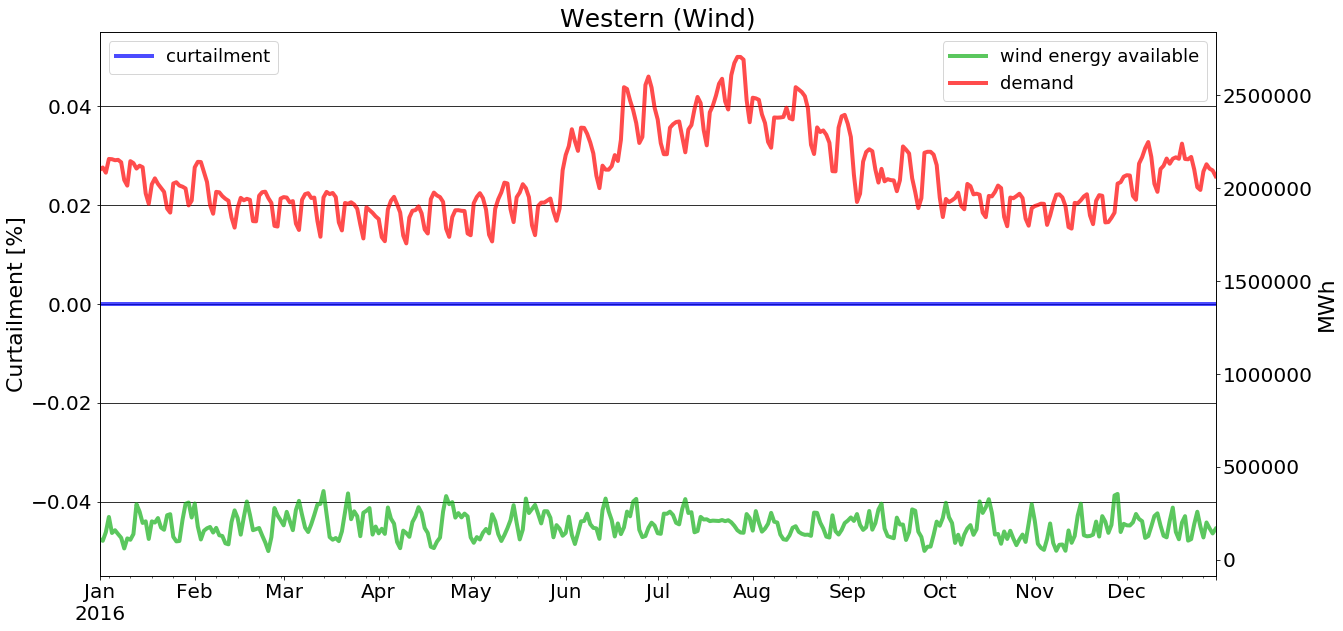

In [15]:
curtailment = apg(s2020CaCong,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [16]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.0 %
Curtailment California/wind: 0.0 %
Curtailment Western/solar: 0.0 %
Curtailment Western/wind: 0.1 %


## California 2030
<a id="ca2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.3 for solar and wind power output for whole western interconnect.

In [17]:
s2030 = Scenario('ca2030')

/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/ecdsakey.py:164: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.ecdsa_curve.curve_class(), pointinfo
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:39: CryptographyDeprecationWarning: encode_point has been deprecated on EllipticCurvePublicNumbers and will be removed in a future version. Please use EllipticCurvePublicKey.public_bytes to obtain both compressed and uncompressed point encoding.
  m.add_string(self.Q_C.public_numbers().encode_point())
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:96: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.curve, Q_S_bytes
/Users/kmueller/REM/lib

SCENARIO: ca2045 | ca2030

--> State
analyze
--> Loading ct
5_ct.pkl not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 5_ct.pkl from server
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub


Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="ca2030_chart"></a>

--> Loading PG
5_PG.pkl not found in /Users/kmueller/ScenarioData/ on local machine


0.00b [00:00, ?b/s]

Transferring 5_PG.pkl from server


100%|##########| 175M/175M [00:10<00:00, 16.7Mb/s] 
 31%|###       | 852k/2.76M [00:00<00:00, 8.38Mb/s]

--> Loading demand
5_demand.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 5_demand.csv from server


100%|##########| 2.76M/2.76M [00:00<00:00, 8.73Mb/s]
  4%|4         | 1.54M/37.4M [00:00<00:02, 15.3Mb/s]

--> Loading solar
5_solar.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 5_solar.csv from server


100%|##########| 37.4M/37.4M [00:02<00:00, 17.9Mb/s]
  3%|3         | 1.21M/36.0M [00:00<00:02, 12.1Mb/s]

--> Loading wind
5_wind.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 5_wind.csv from server


100%|##########| 36.0M/36.0M [00:01<00:00, 18.5Mb/s]
  2%|1         | 1.47M/74.8M [00:00<00:04, 14.7Mb/s]

--> Loading hydro
5_hydro.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 5_hydro.csv from server


100%|##########| 74.8M/74.8M [00:03<00:00, 19.4Mb/s]


Set UTC for all zones


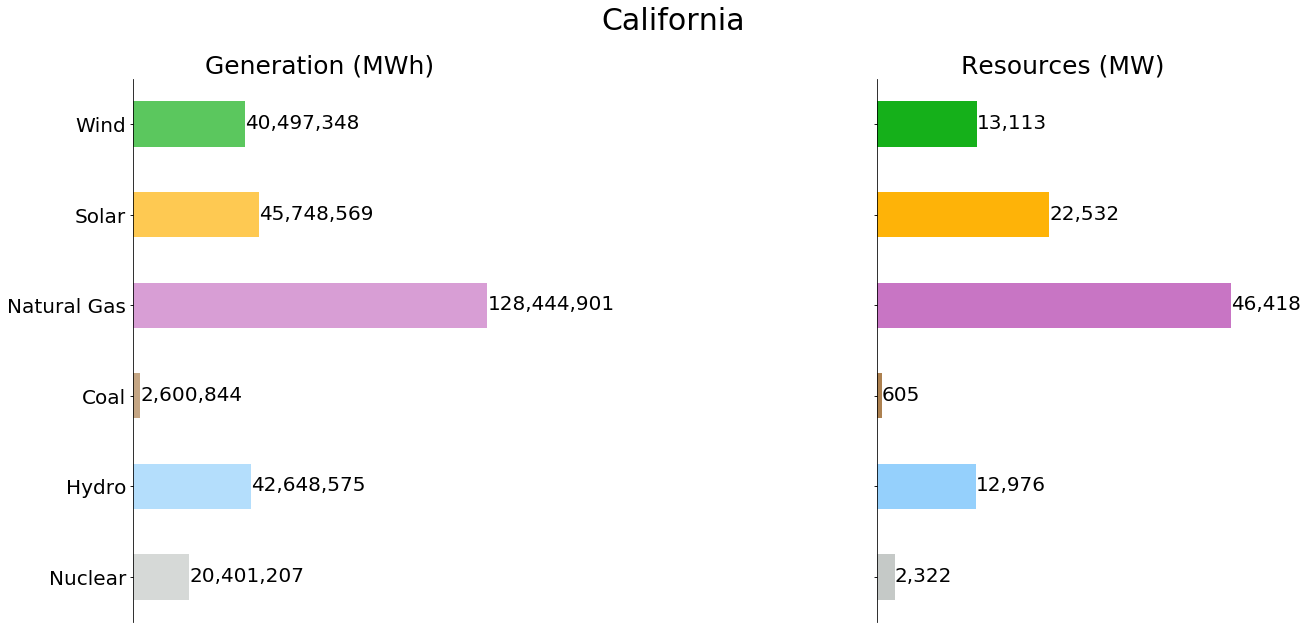

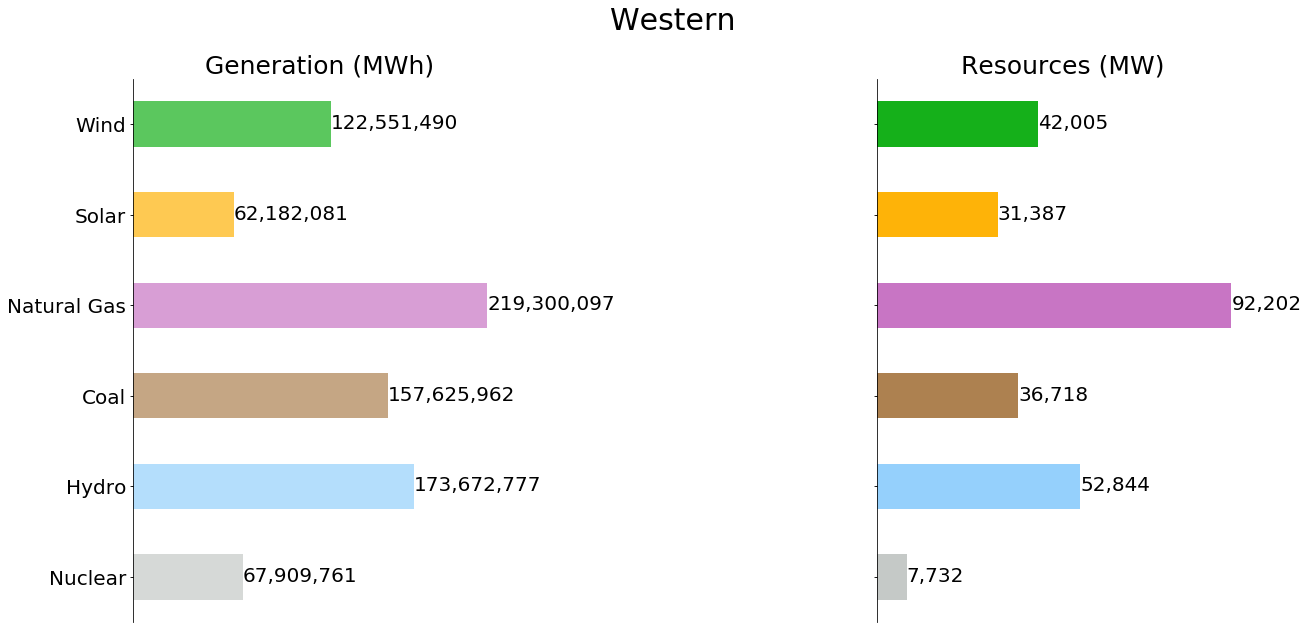

Total Generation in Western Interconnection: 803242171 MWh
Total Capacity in Western Interconnection: 262892 MW


In [18]:
chart = apg(s2030 ,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="ca2030_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


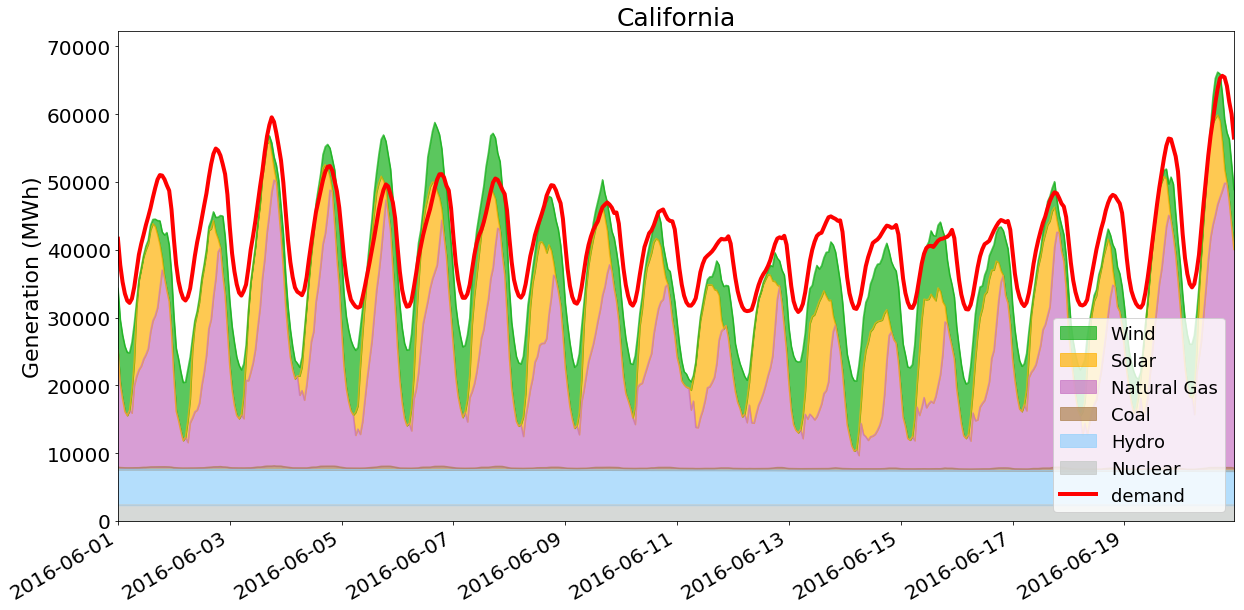

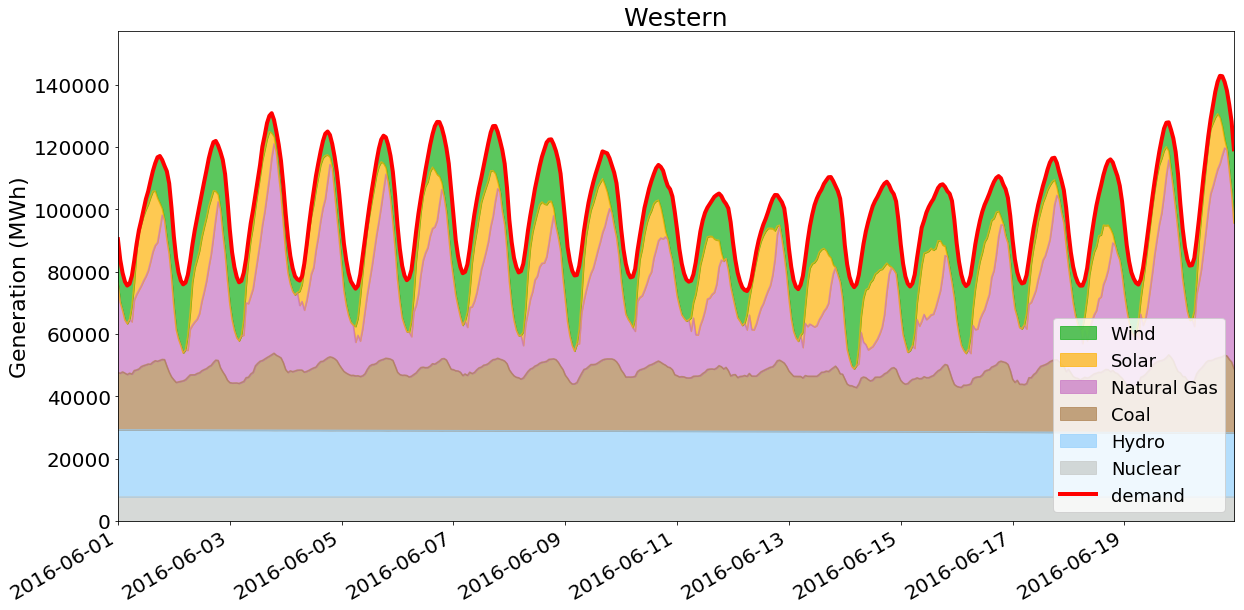

Generation in the Western interconnection in MWh:
95497191.70822236


In [19]:
stack = apg(s2030,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="ca2030_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


/Users/kmueller/REM/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


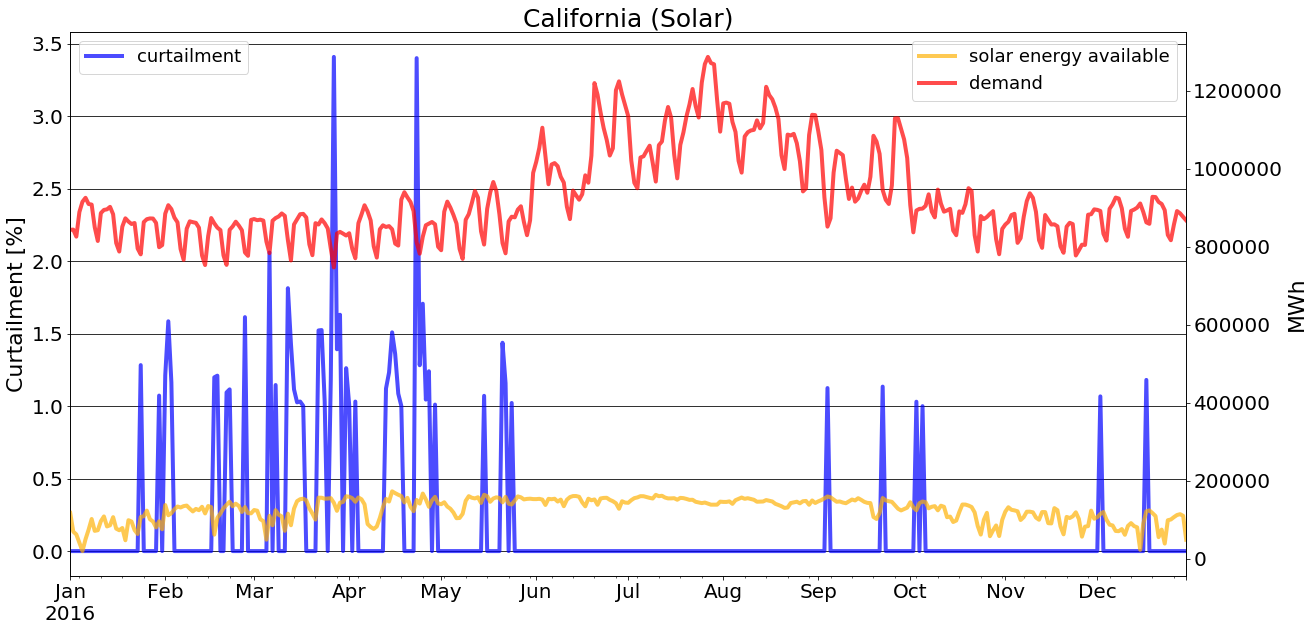

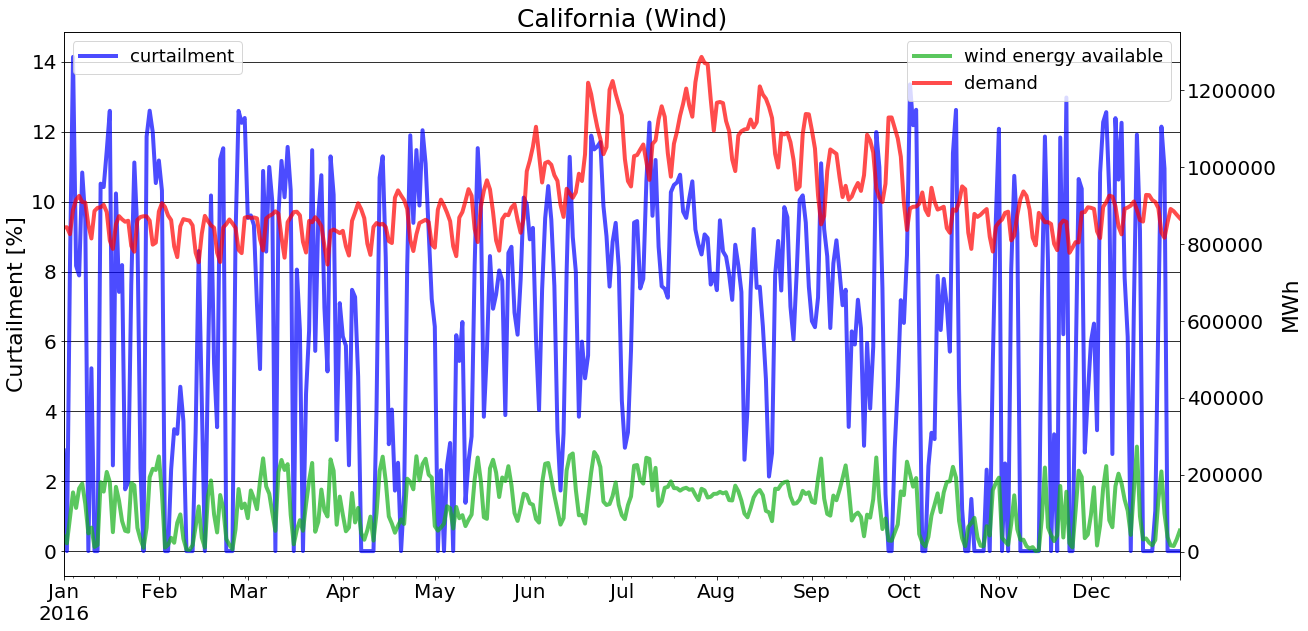

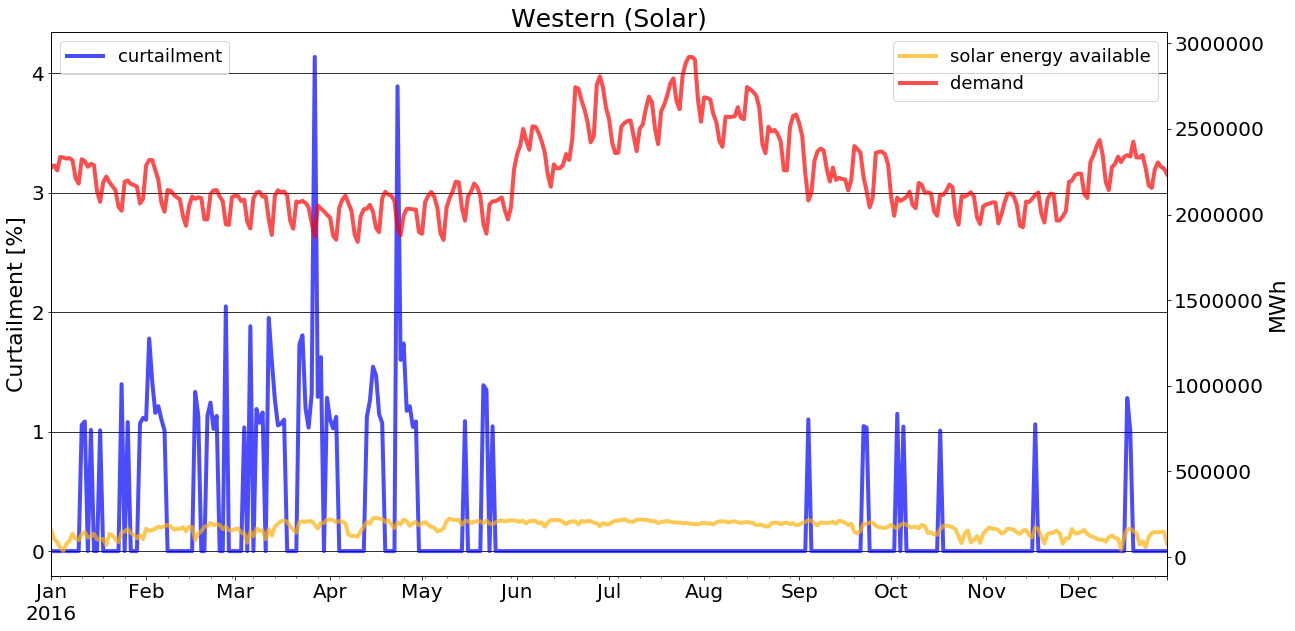

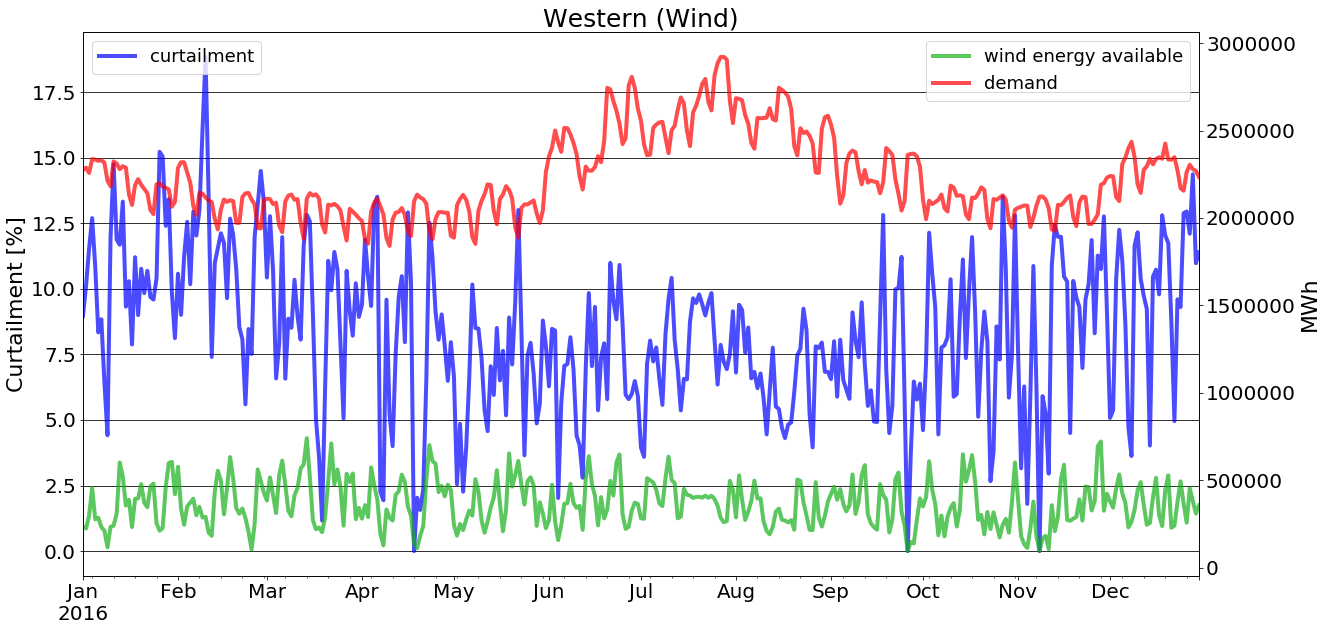

In [20]:
curtailment = apg(s2030,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [21]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.7 %
Curtailment California/wind: 8.3 %
Curtailment Western/solar: 0.8 %
Curtailment Western/wind: 8.9 %


## Congestion 2030
<a id="congestion2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.3 for solar and wind power output for whole western interconnect.  
Capacity of congested transmission lines in California: x2

In [22]:
s2030CaCong = Scenario('ca2030FixCaCong')

/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/ecdsakey.py:164: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.ecdsa_curve.curve_class(), pointinfo
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:39: CryptographyDeprecationWarning: encode_point has been deprecated on EllipticCurvePublicNumbers and will be removed in a future version. Please use EllipticCurvePublicKey.public_bytes to obtain both compressed and uncompressed point encoding.
  m.add_string(self.Q_C.public_numbers().encode_point())
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:96: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.curve, Q_S_bytes
/Users/kmueller/REM/lib

SCENARIO: ca2045 | ca2030FixCaCong

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="congestion2030_chart"></a>

--> Loading PG


0.00b [00:00, ?b/s]

--> Loading demand
--> Loading solar
6_solar.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 6_solar.csv from server


100%|##########| 37.4M/37.4M [00:01<00:00, 19.9Mb/s]
  5%|4         | 1.64M/36.0M [00:00<00:02, 16.0Mb/s]

--> Loading wind
6_wind.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 6_wind.csv from server


100%|##########| 36.0M/36.0M [00:01<00:00, 18.1Mb/s]
  2%|1         | 1.38M/74.8M [00:00<00:05, 13.8Mb/s]

--> Loading hydro
6_hydro.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 6_hydro.csv from server


100%|##########| 74.8M/74.8M [00:03<00:00, 19.9Mb/s]


Set UTC for all zones


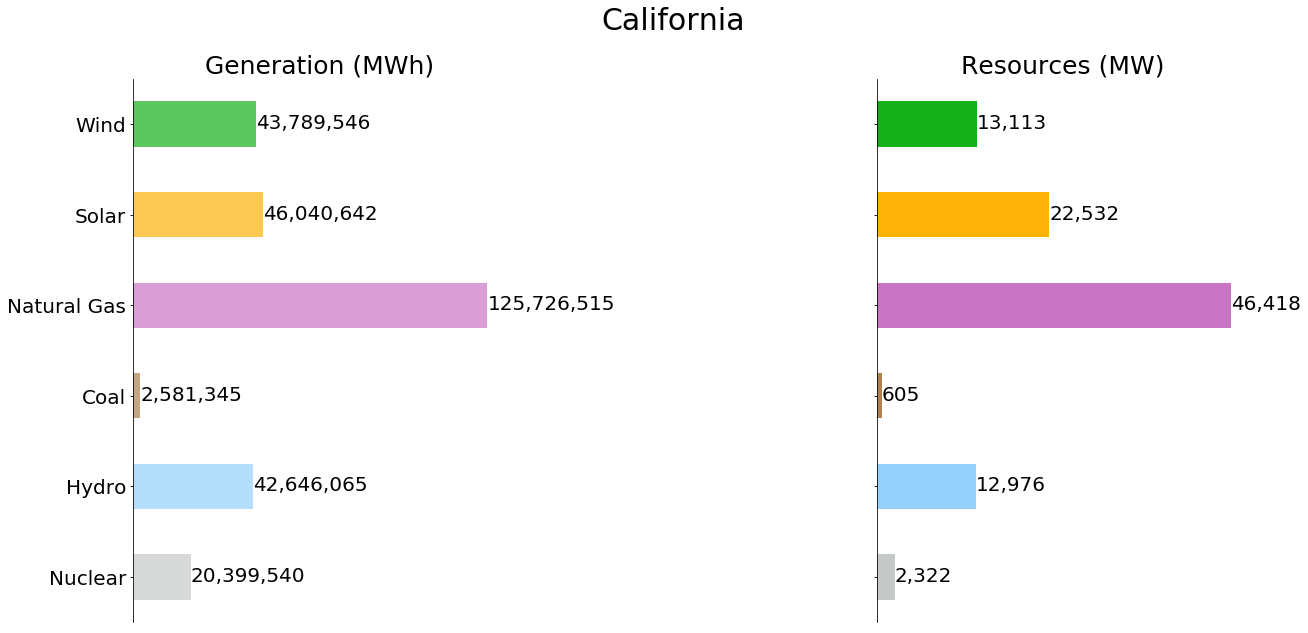

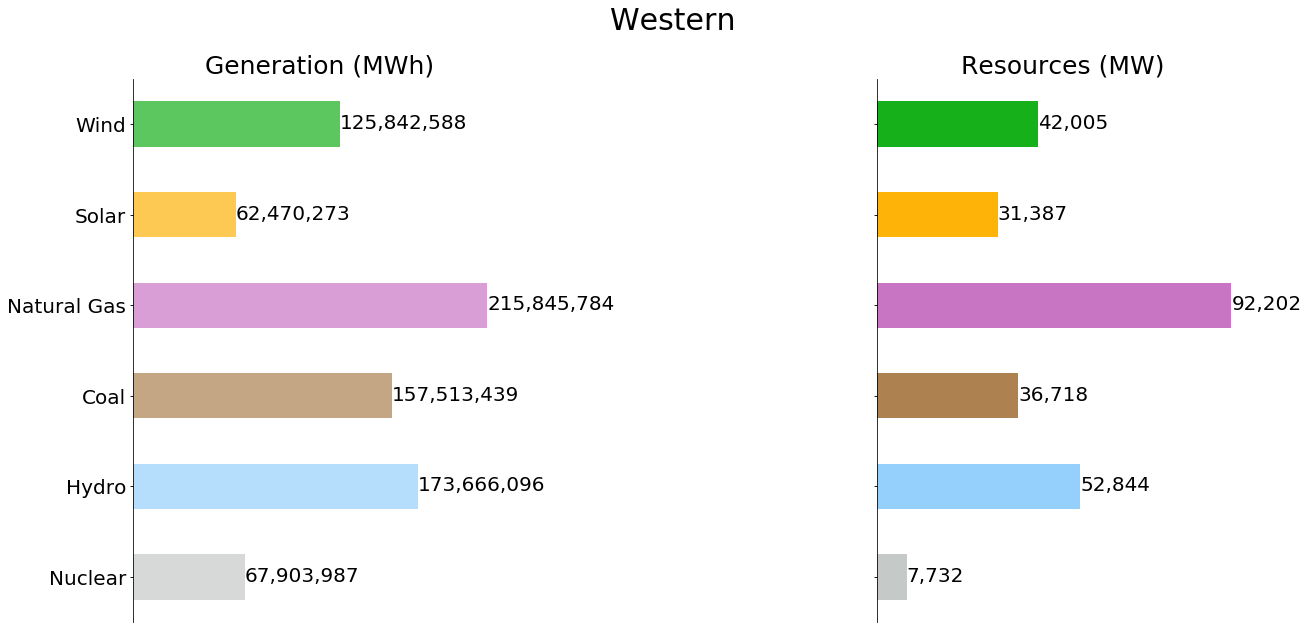

Total Generation in Western Interconnection: 803242171 MWh
Total Capacity in Western Interconnection: 262892 MW


In [23]:
chart = apg(s2030CaCong,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="congestion2030_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


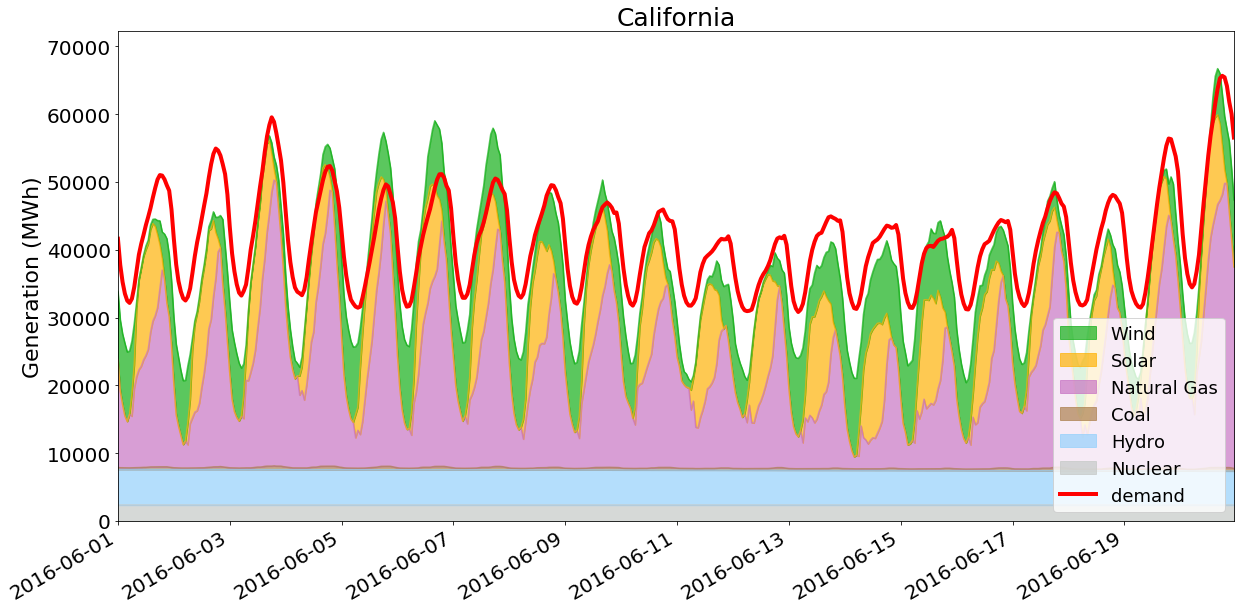

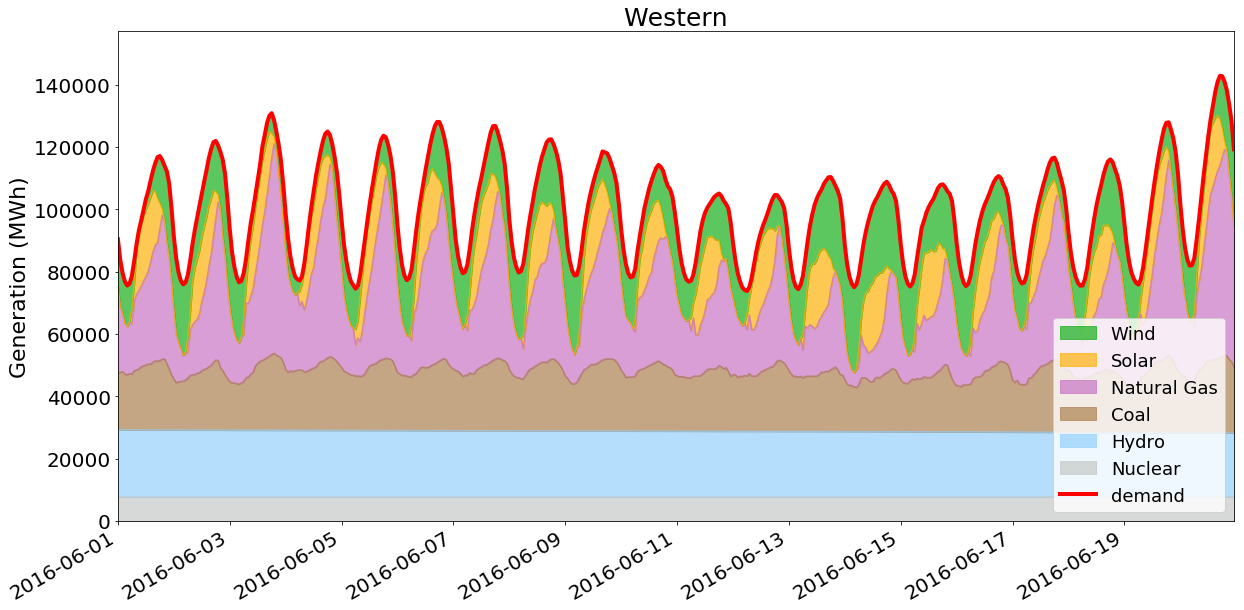

Generation in the Western interconnection in MWh:
95497191.7082454


In [24]:
stack = apg(s2030CaCong,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="congestion2030_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


/Users/kmueller/REM/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


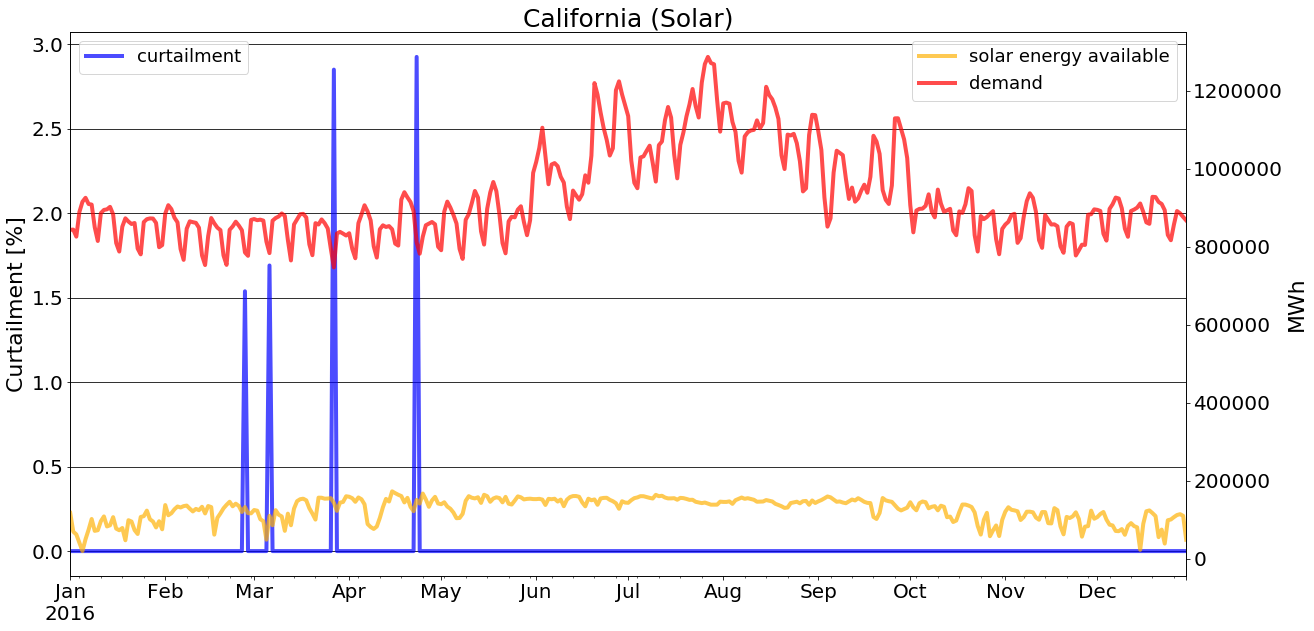

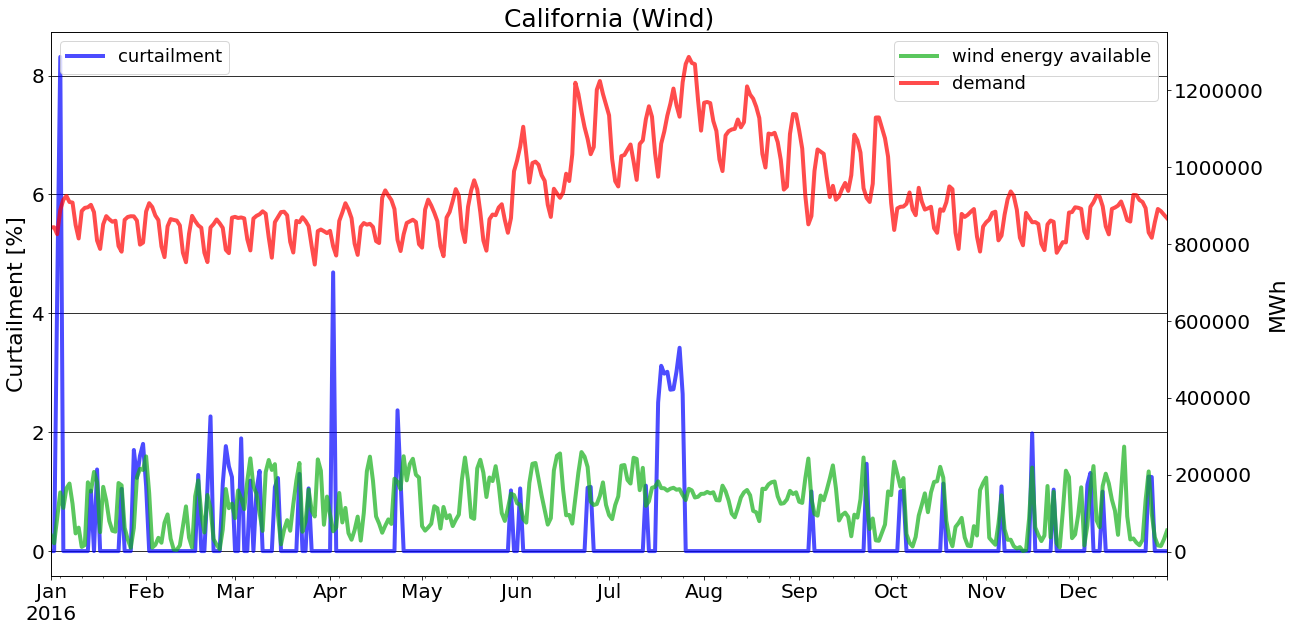

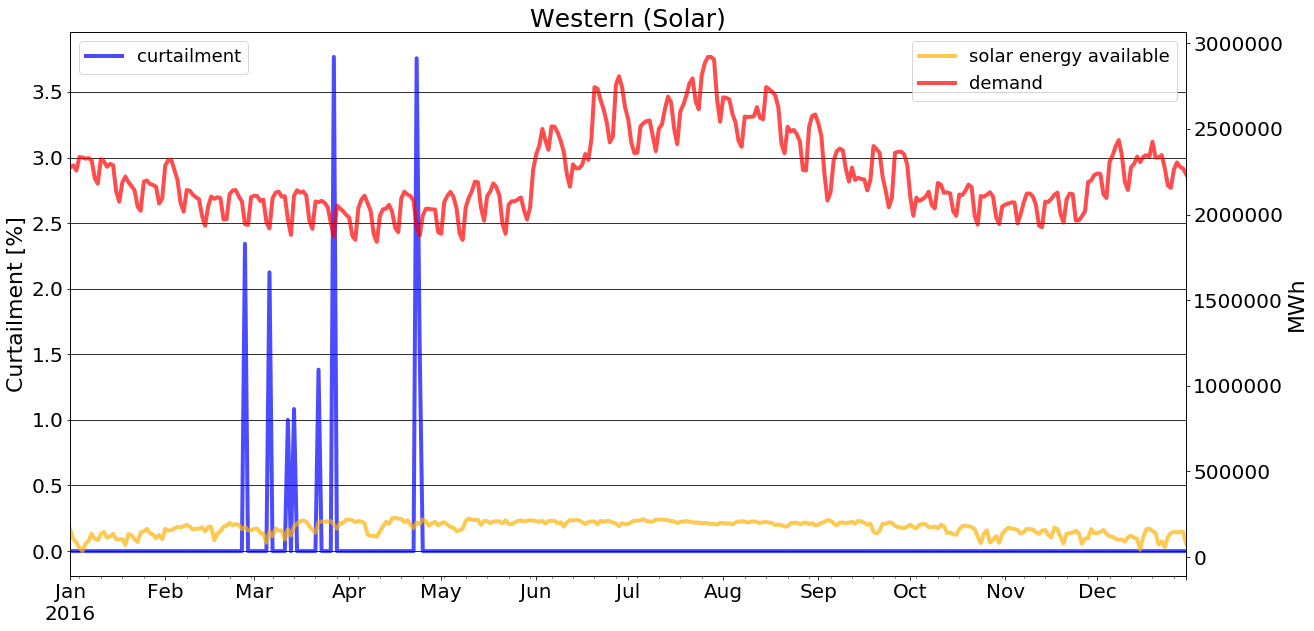

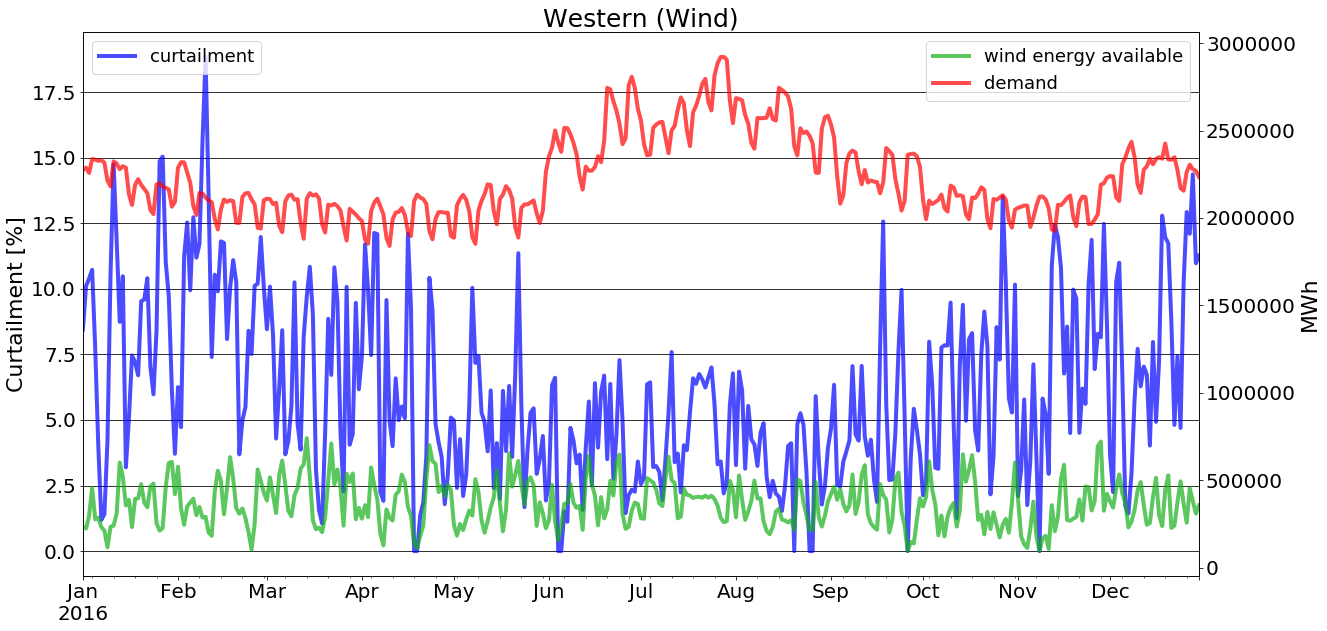

In [25]:
curtailment = apg(s2030CaCong,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [26]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.1 %
Curtailment California/wind: 0.8 %
Curtailment Western/solar: 0.3 %
Curtailment Western/wind: 6.4 %


## West 2020
<a id="west2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.25 for solar and wind power output for whole western interconnect.

In [27]:
s2020West = Scenario('ca2020WestTarget')

/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/ecdsakey.py:164: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.ecdsa_curve.curve_class(), pointinfo
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:39: CryptographyDeprecationWarning: encode_point has been deprecated on EllipticCurvePublicNumbers and will be removed in a future version. Please use EllipticCurvePublicKey.public_bytes to obtain both compressed and uncompressed point encoding.
  m.add_string(self.Q_C.public_numbers().encode_point())
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:96: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.curve, Q_S_bytes
/Users/kmueller/REM/lib

SCENARIO: ca2045 | ca2020WestTarget

--> State
analyze
--> Loading ct
4_ct.pkl not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 4_ct.pkl from server
--> Loading Western interconnect
Loading zone
Loading sub


Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="west2020_chart"></a>

--> Loading PG
4_PG.pkl not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 4_PG.pkl from server


100%|##########| 175M/175M [00:09<00:00, 18.7Mb/s] 
 59%|#####9    | 1.64M/2.76M [00:00<00:00, 16.4Mb/s]

--> Loading demand
4_demand.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 4_demand.csv from server


100%|##########| 2.76M/2.76M [00:00<00:00, 17.2Mb/s]
  5%|4         | 1.84M/37.4M [00:00<00:01, 17.8Mb/s]

--> Loading solar
4_solar.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 4_solar.csv from server


100%|##########| 37.4M/37.4M [00:01<00:00, 22.2Mb/s]
  4%|3         | 1.38M/36.0M [00:00<00:02, 13.7Mb/s]

--> Loading wind
4_wind.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 4_wind.csv from server


100%|##########| 36.0M/36.0M [00:01<00:00, 20.3Mb/s]
  2%|1         | 1.25M/74.8M [00:00<00:06, 12.2Mb/s]

--> Loading hydro
4_hydro.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 4_hydro.csv from server


100%|##########| 74.8M/74.8M [00:03<00:00, 18.8Mb/s]


Set UTC for all zones


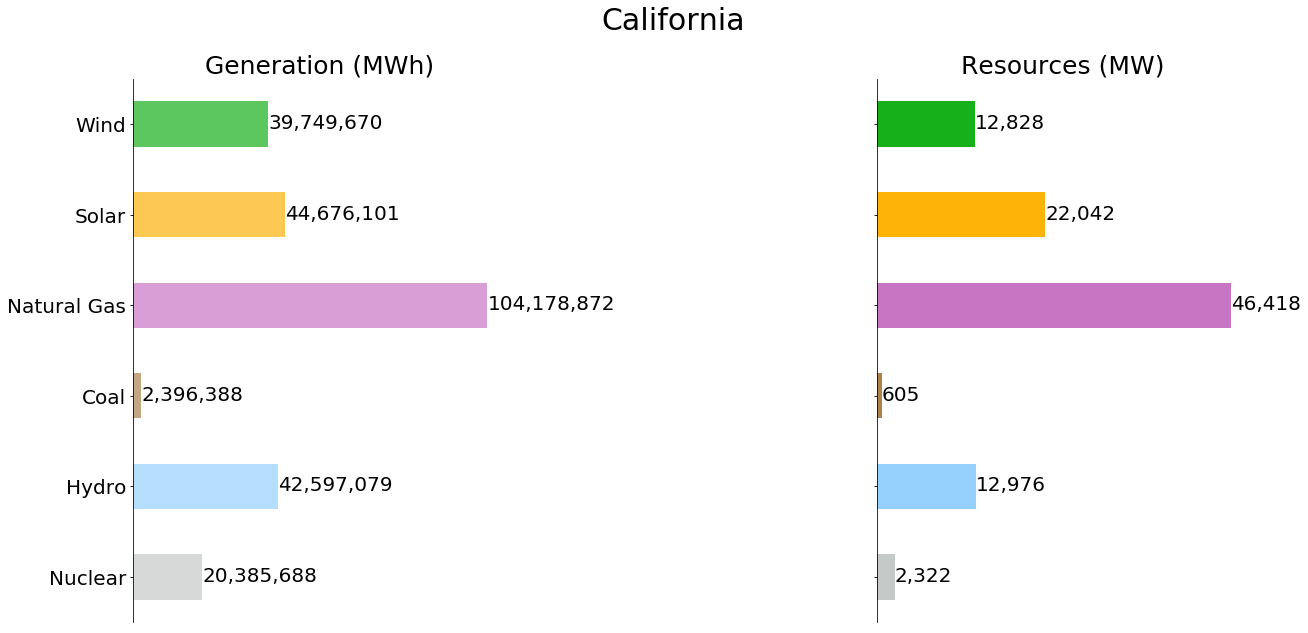

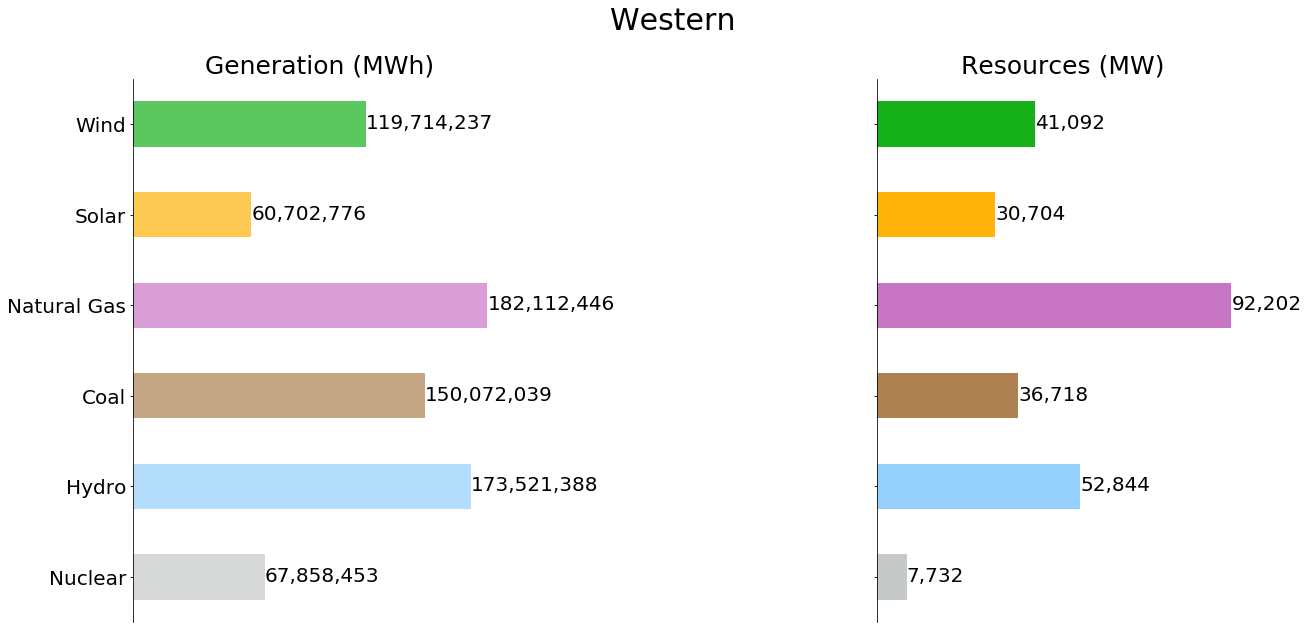

Total Generation in Western Interconnection: 753981342 MWh
Total Capacity in Western Interconnection: 261297 MW


In [28]:
chart = apg(s2020West,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="west2020_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


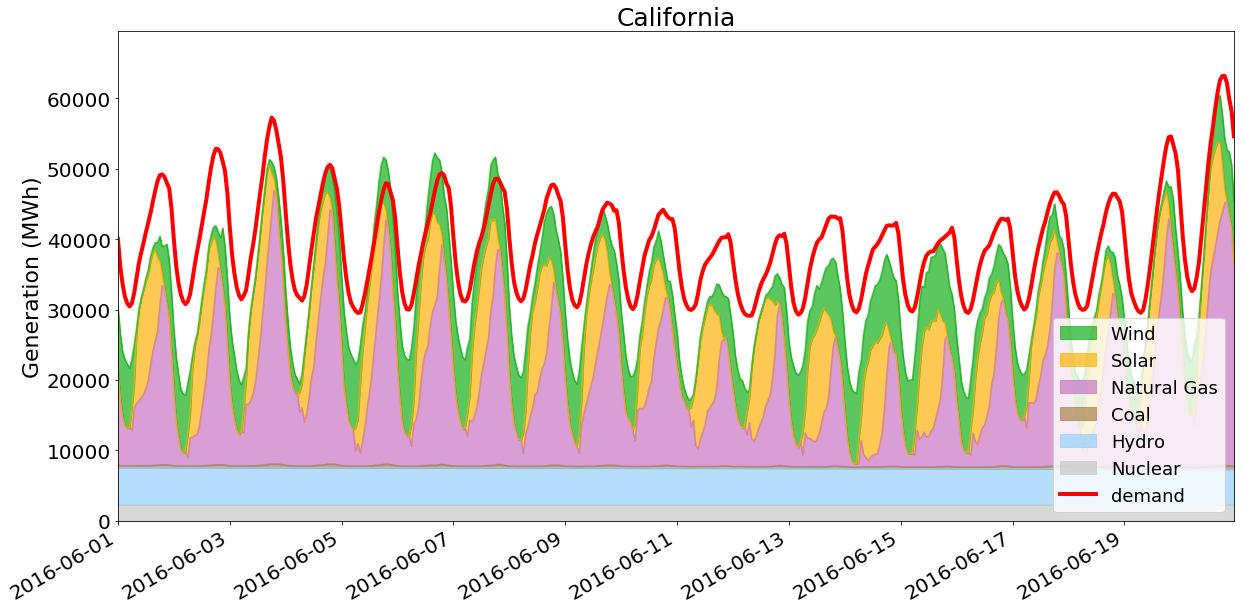

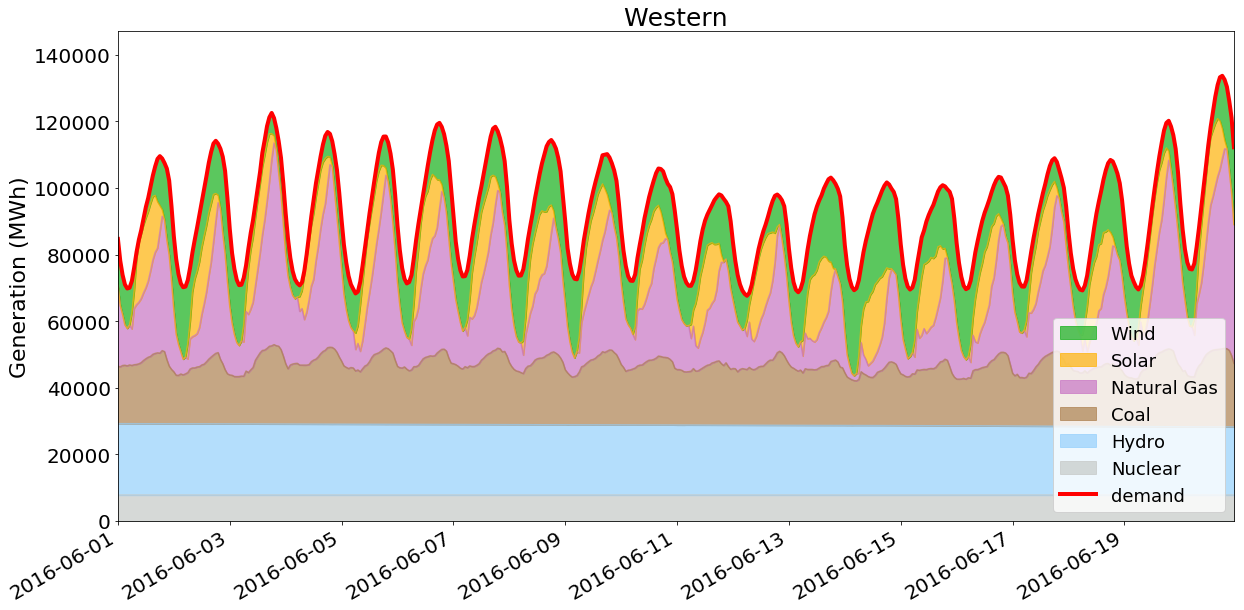

Generation in the Western interconnection in MWh:
88388034.35132152


In [29]:
stack = apg(s2020West,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="west2020_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


/Users/kmueller/REM/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


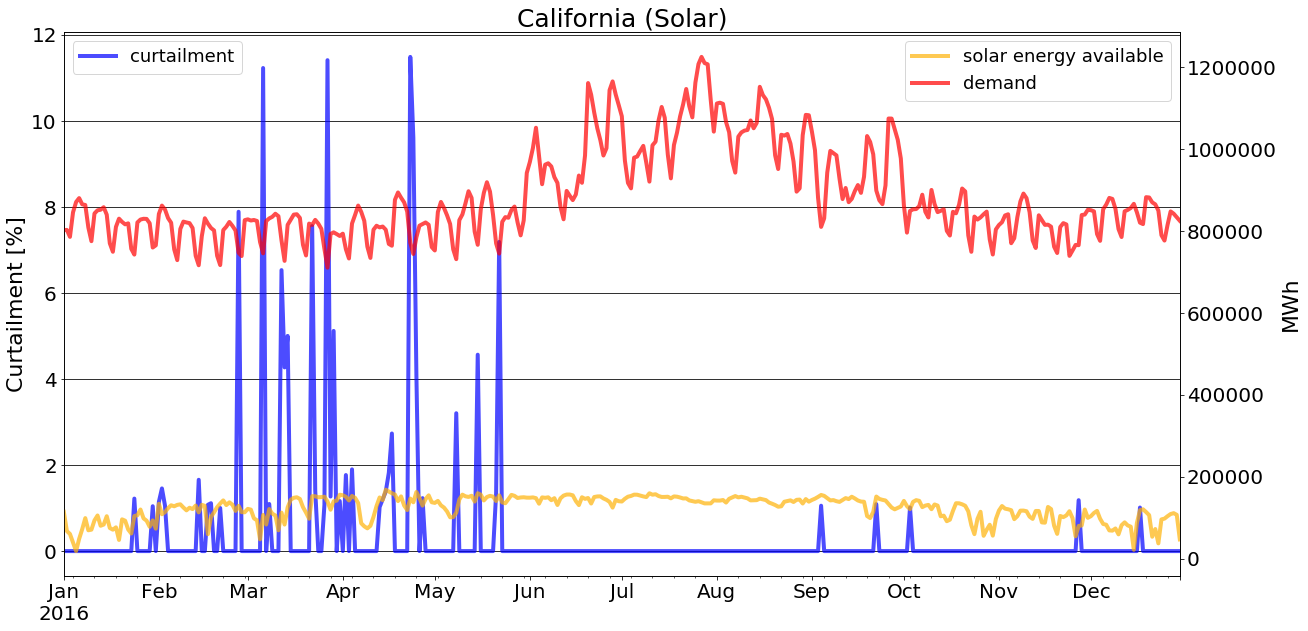

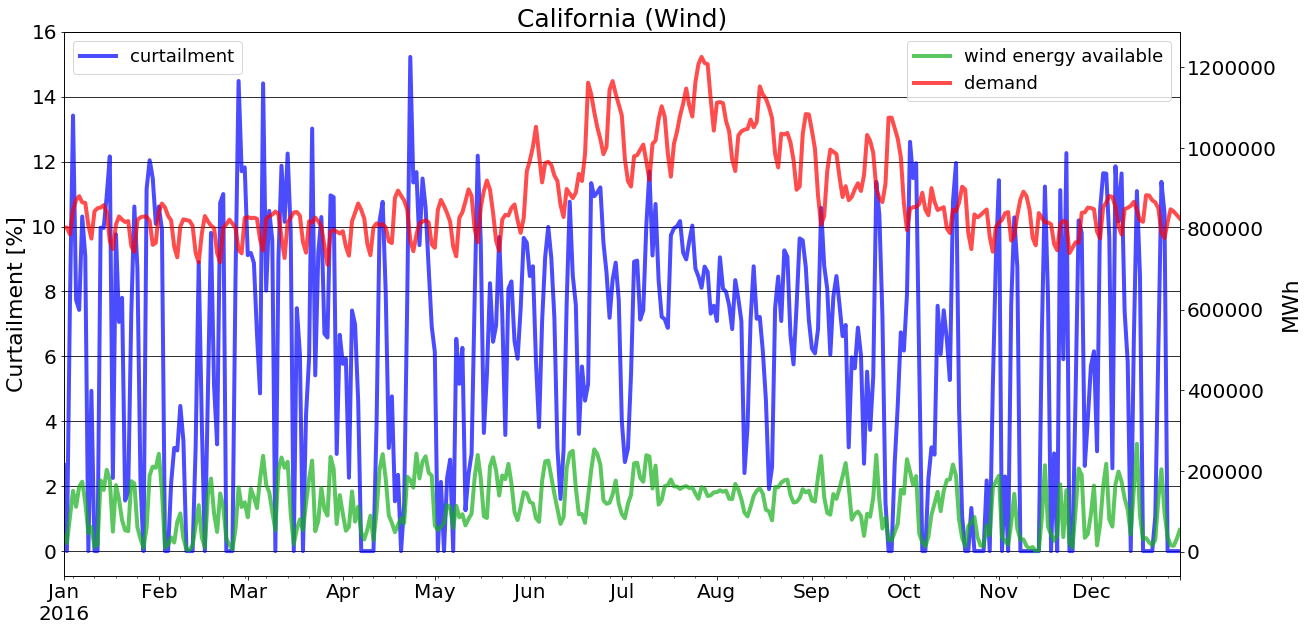

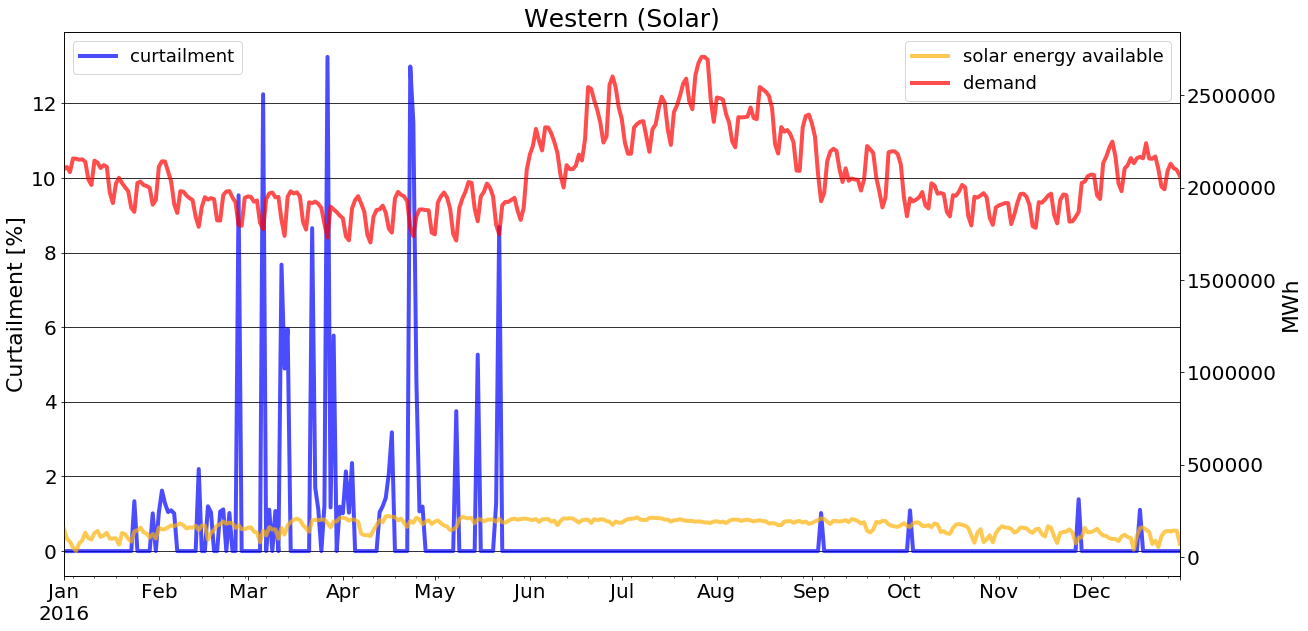

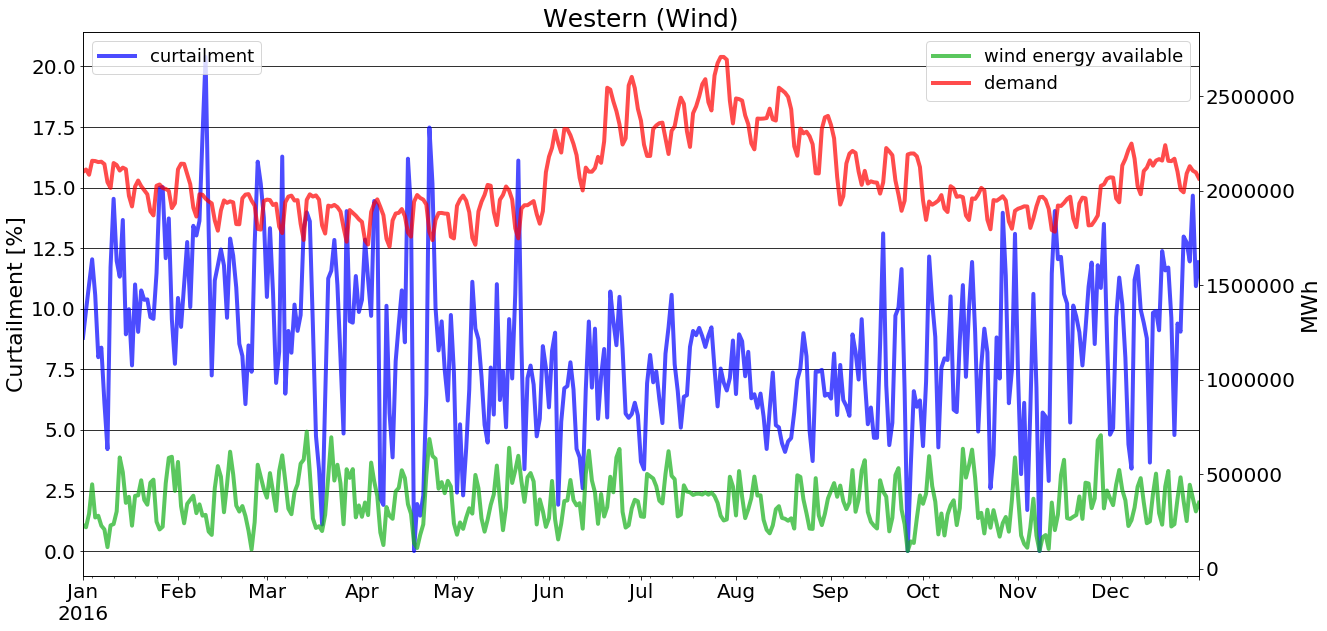

In [30]:
curtailment = apg(s2020West,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [31]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.9 %
Curtailment California/wind: 7.9 %
Curtailment Western/solar: 1.0 %
Curtailment Western/wind: 9.0 %


## West 2030
<a id="west2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 5 for solar and wind power output for whole western interconnect.

In [32]:
s2030West = Scenario('ca2030WestTarget')

/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/ecdsakey.py:164: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.ecdsa_curve.curve_class(), pointinfo
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:39: CryptographyDeprecationWarning: encode_point has been deprecated on EllipticCurvePublicNumbers and will be removed in a future version. Please use EllipticCurvePublicKey.public_bytes to obtain both compressed and uncompressed point encoding.
  m.add_string(self.Q_C.public_numbers().encode_point())
/Users/kmueller/REM/lib/python3.6/site-packages/paramiko/kex_ecdh_nist.py:96: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.curve, Q_S_bytes
/Users/kmueller/REM/lib

SCENARIO: ca2045 | ca2030WestTarget

--> State
analyze
--> Loading ct
8_ct.pkl not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 8_ct.pkl from server
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus


Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="west2030_chart"></a>

--> Loading PG
8_PG.pkl not found in /Users/kmueller/ScenarioData/ on local machine


  1%|          | 1.28M/175M [00:00<00:13, 12.4Mb/s]

Transferring 8_PG.pkl from server


100%|##########| 175M/175M [00:09<00:00, 14.7Mb/s] 
 57%|#####7    | 1.57M/2.76M [00:00<00:00, 15.7Mb/s]

--> Loading demand
8_demand.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 8_demand.csv from server


100%|##########| 2.76M/2.76M [00:00<00:00, 13.1Mb/s]
  3%|3         | 1.25M/37.4M [00:00<00:02, 12.3Mb/s]

--> Loading solar
8_solar.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 8_solar.csv from server


100%|##########| 37.4M/37.4M [00:02<00:00, 16.0Mb/s]
  4%|3         | 1.38M/36.0M [00:00<00:02, 13.2Mb/s]

--> Loading wind
8_wind.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 8_wind.csv from server


100%|##########| 36.0M/36.0M [00:01<00:00, 18.7Mb/s]
  1%|1         | 1.11M/74.8M [00:00<00:06, 11.1Mb/s]

--> Loading hydro
8_hydro.csv not found in /Users/kmueller/ScenarioData/ on local machine
Transferring 8_hydro.csv from server


100%|##########| 74.8M/74.8M [00:04<00:00, 18.5Mb/s]


Set UTC for all zones


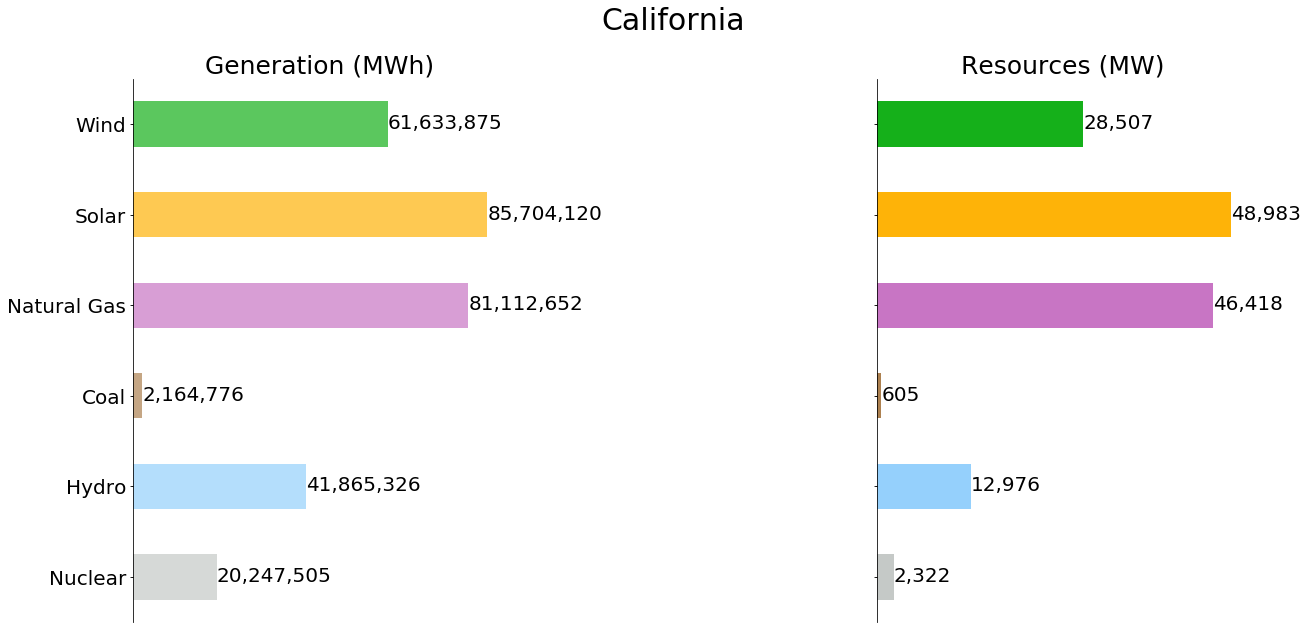

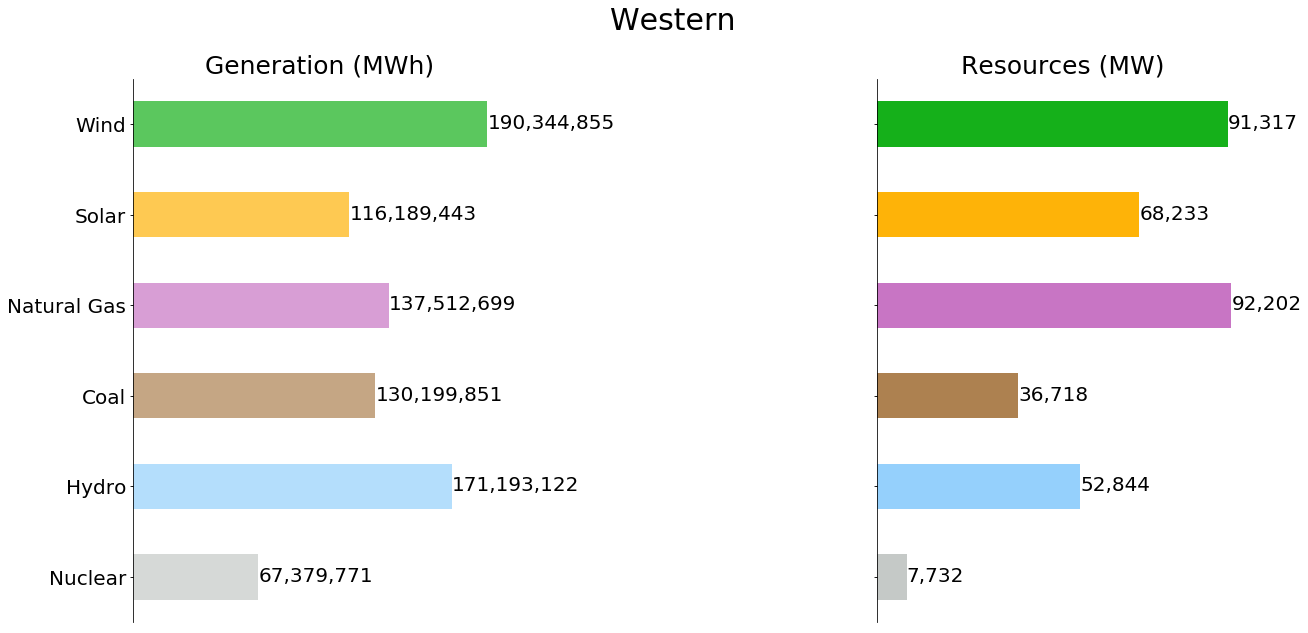

Total Generation in Western Interconnection: 812819743 MWh
Total Capacity in Western Interconnection: 349049 MW


In [33]:
chart = apg(s2030West,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="west2030_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


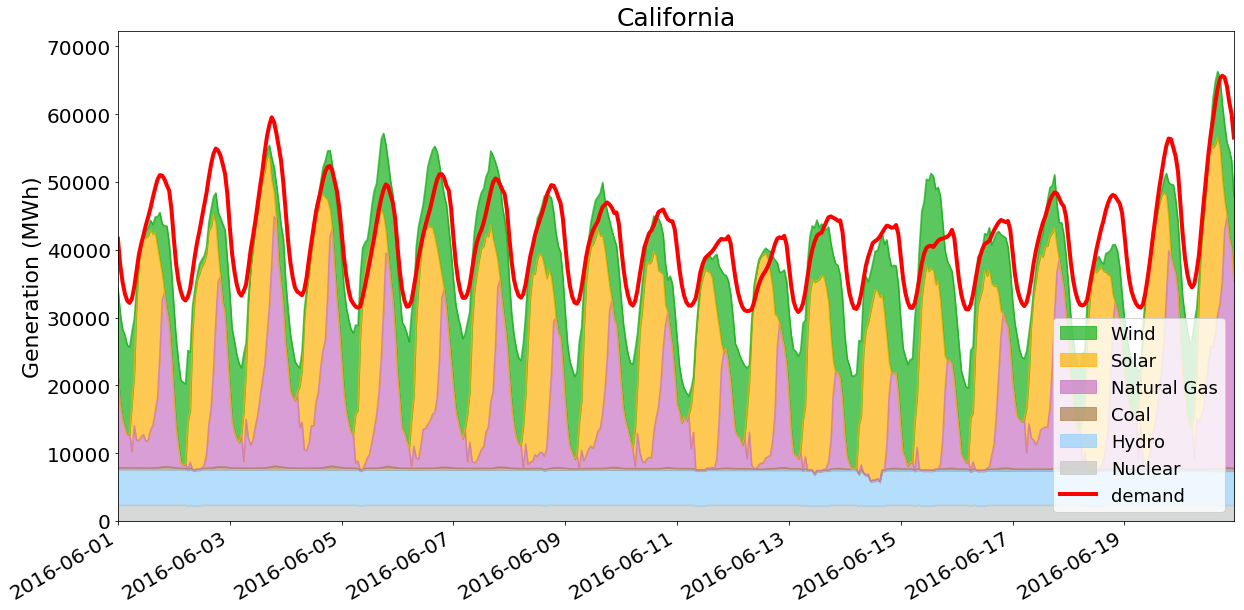

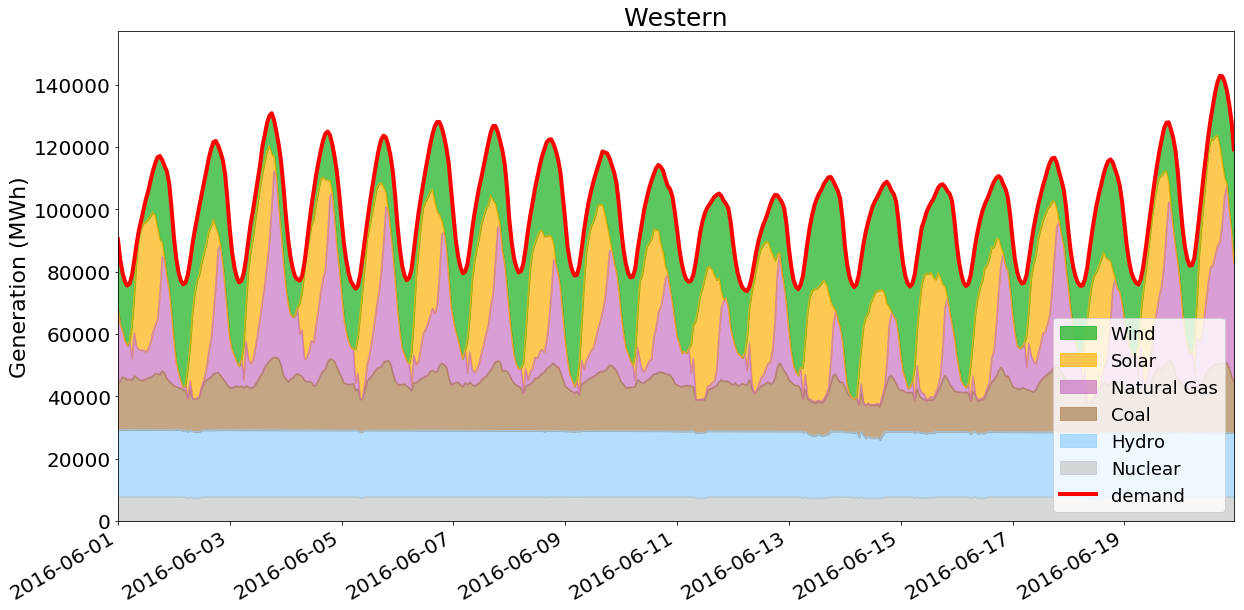

Generation in the Western interconnection in MWh:
95497191.71122605


In [34]:
stack = apg(s2030West,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="west2030_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


/Users/kmueller/REM/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


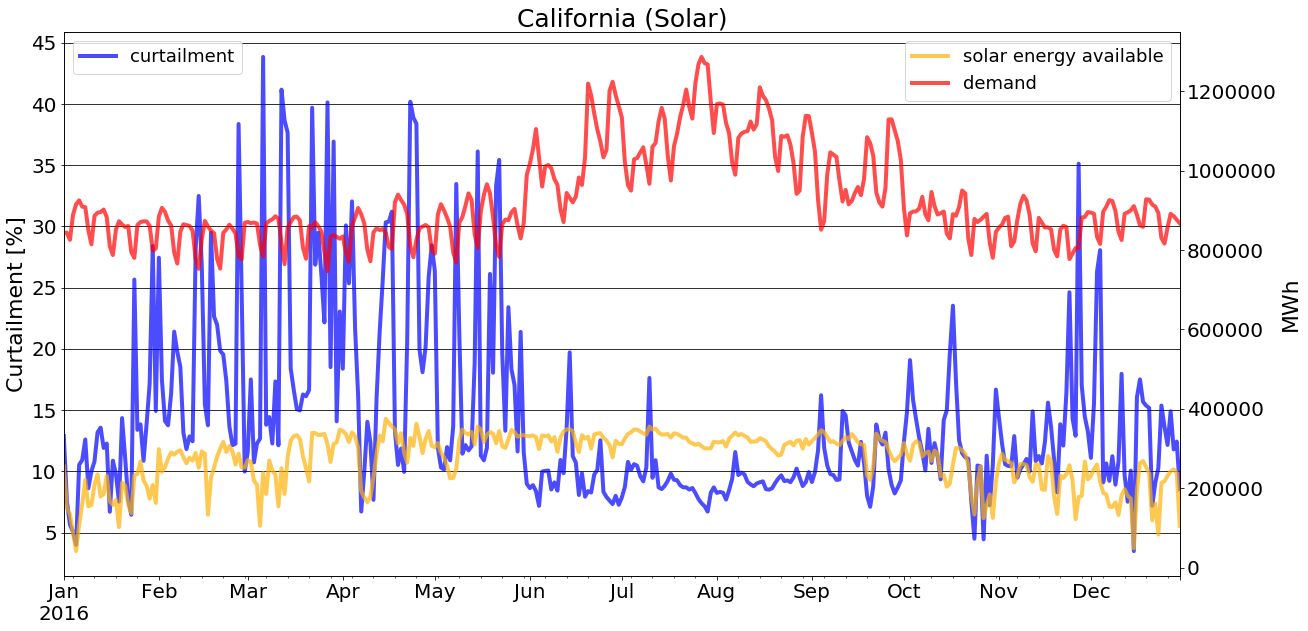

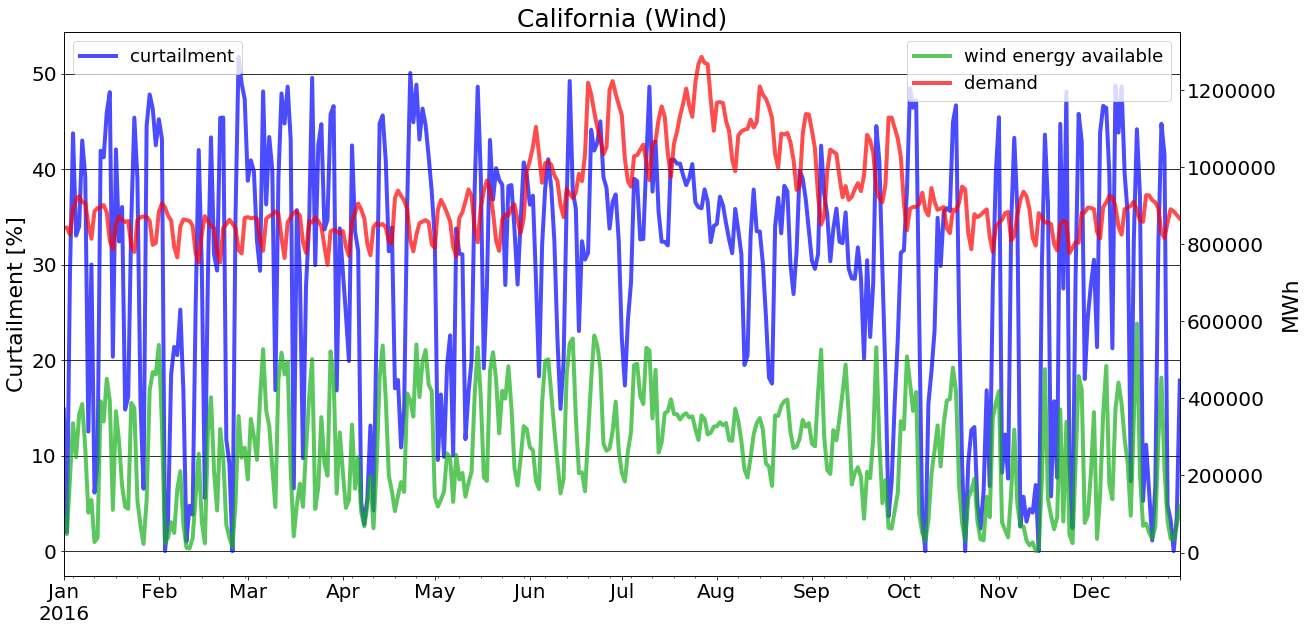

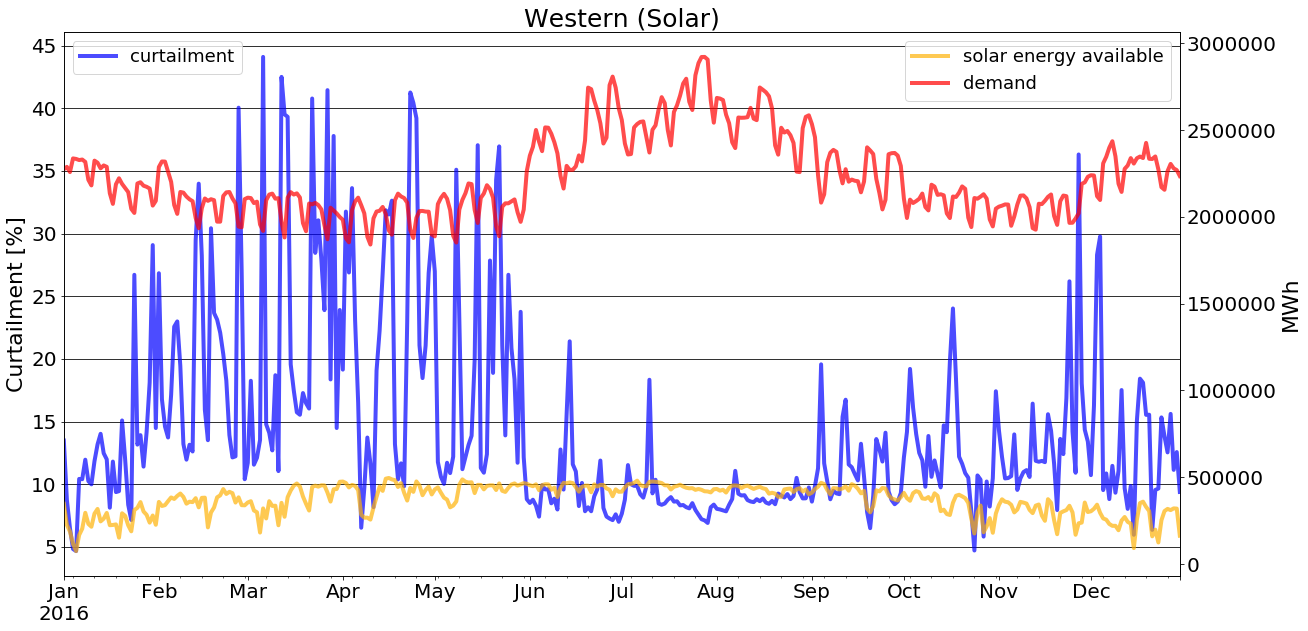

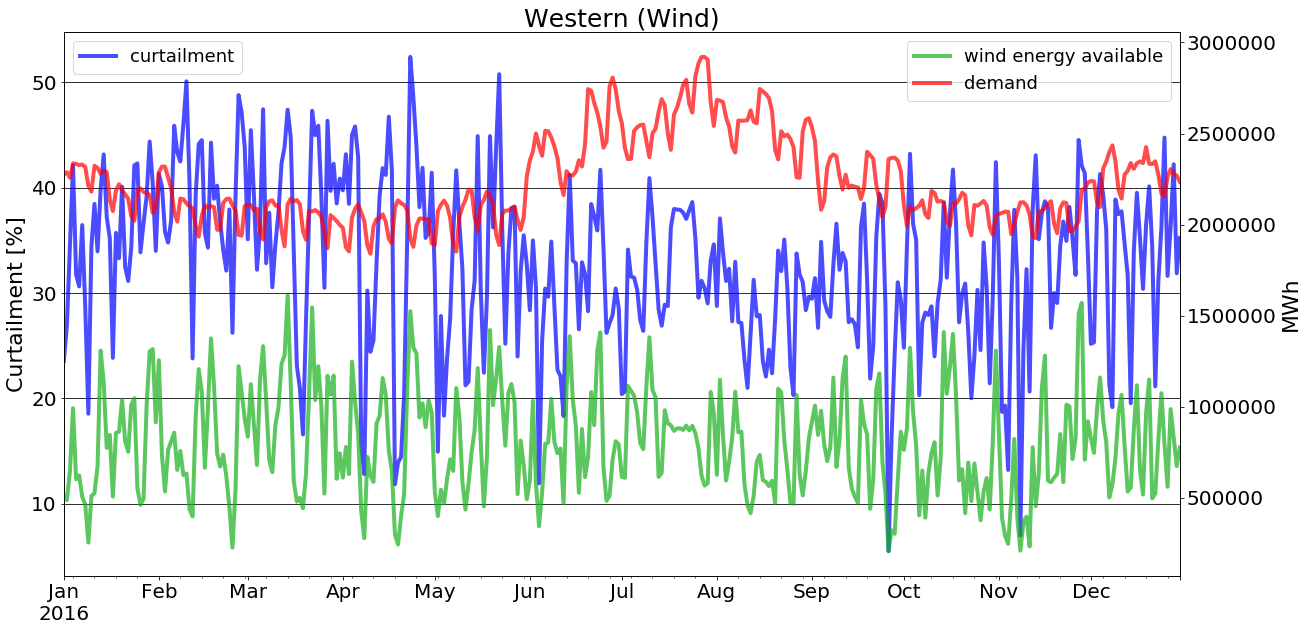

In [35]:
curtailment = apg(s2030West,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [36]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 14.4 %
Curtailment California/wind: 35.8 %
Curtailment Western/solar: 14.7 %
Curtailment Western/wind: 34.9 %
